# Tutorial on analysis pipelines for visual experience datasets

Johannes Zauner, Aaron Nicholls, Lisa Ostrin, and Manuel Spitschan  
July 8, 2025

## 1 Abstract

This tutorial presents an analysis pipeline for visual experience datasets, with a focus on reproducible workflows tailored for use in human chronobiology and myopia research. Light exposure and its retinal encoding affect human physiology and behaviour over various time scales. Here, we provide step-by-step instructions for importing, visualising, and processing data for viewing distance and light exposure data using the open-source tool LightLogR. This includes time-series analysis for working distance, spectral characteristics, and biologically relevant light metrics. By leveraging a modular approach, this tutorial supports researchers in building flexible and robust pipelines that can accommodate diverse experimental paradigms and measurement systems.

## 2 Introduction

Exposure to the optical environment — often referred to as visual experience — profoundly influences human physiology and behaviour across multiple time scales. Two notable examples, though from distinct research domains, can be understood through a common, retinally-referenced conceptual framework.

The first relates to the non-visual effects of light on human circadian and neuroendocrine physiology. The light–dark cycle entrains the circadian clock, and light exposure during the night suppresses melatonin production ([Brown et al. 2022](#ref-Brown2022PLoSBiol); [Blume, Garbazza, and Spitschan 2019](#ref-Blume2019Somnologie)).

The second concerns the influence of visual experience on ocular development, particularly myopia. Time spent outdoors — characterised by distinct optical environments — has been consistently associated with protective effects on ocular growth and health outcomes ([Dahlmann-Noor et al. 2025](#ref-DahlmannNoor2025GraefesArchClinExpOphthal)).

In controlled laboratory settings, light exposure can be held constant or manipulated parametrically. However, such exposures rarely replicate real-world conditions, which are inherently complex and dynamic. As people move in and between spaces (indoors and outdoors) and move their body, head, and eyes, the exposure to the optical environment varies significantly ([Webler et al. 2019](#ref-Webler2019CurrOpinBehavSci)), and is modulated by behaviour ([Biller, Balakrishnan, and Spitschan 2024](#ref-Biller2024CommunPsychol)). Wearable devices for measuring light exposure have thus emerged as vital tools in capturing the richness of ecological visual experience. These tools generate high-dimensional datasets that demand rigorous and flexible analysis strategies.

Starting in the 1980s ([Okudaira, Kripke, and Webster 1983](#ref-Okudaira1983AmJPhysiol)), technology to measure exposure to the optical environment has been developed and matured, with miniaturized illuminance sensors now (2025) being very common in consumer smartwatches. In research, several device and device types are available, which differ in their functionality, ranging from small pin-like devices measuring light exposure ([Mohamed et al. 2021](#ref-Mohamed2021OptExpress)) to head-mounted multi-modal measurement devices capturing almost all relevant aspects of visual experience ([Gibaldi et al. 2024](#ref-Gibaldi2024TranslVisSciTechnol)). With the increased technical capabilities in wearables come considerably complex and dense datasets. These go hand in hand with a significant number of metrics, as revealed by review papers, in both fields.

At present, the analysis processes to derive metrics are often implemented on a by-workgroup, or even by-researcher basis, which is both a potential source of errors and inconsistencies between publications, and also a considerable time sink for researchers ([Hartmeyer, Webler, and Andersen 2022](#ref-Hartmeyer2022LightResTechnol)). Too often, more time is spent preparing the data than in actually gaining insights through rigoruous statistical testing and exploration. The preparation tasks are best handled, or at least facilitated, by standardized, transparent, and community-based pipelines for analysis ([L. A. S. Zauner Johannes AND Udovicic 2024](#ref-Zauner2024PLOSONE)).

In circadian research, the package LightLogR for R statistical software was developed ([J. Zauner, Hartmeyer, and Spitschan 2025](#ref-Zauner2025JOpenSourceSoftw)). LightLogR is an open-source, MIT licensed, and community-driven package specifically made to work with data from wearable light loggers and optical radiation dosimeters. It also contains functions to calculate over sixty different metrics used in the field ([Hartmeyer and Andersen 2023](#ref-Hartmeyer2023LightResTechnol)). In a recent [update](https://tscnlab.github.io/LightLogR/news/index.html#lightlogr-090-sunrise) the package was significantly expanded to deal with modalities beyond illuminance, like distance or even light spectra, which are highly relevant for myopia research ([Hönekopp and Weigelt 2023](#ref-Honekopp2023ClinOphthalmol)).

In this article we show that the analysis pipelines and metric functions in LightLogR naturally apply to the whole field of visual experience, not just circadian research and chronobiology. Our approach is modular and extensible, allowing researchers to adapt it to a variety of devices and research questions. Emphasis is placed on clarity, transparency, and reproducibility, aligning with best practices in scientific computing and open science. We use data from two devices to demonstrate the LightLogR workflow and output with metrics relevant in the field of myopia, covering metrics for working distance, daylight exposure, and spectral analyses. It is recommended to recreate the analysis in this script. All necessary data and code are provided under an open license in the [GitHub repository](https://github.com/tscnlab/ZaunerEtAl2025JOV).

## 3 Methods and materials

### 3.1 Software

This tutorial is built with `Quarto`, an open-source scientific and technical publishing system, integrating text, code, and code-output into a single document. The source-code to reproduce the outcomes is part of the document and accessible via the `code-tools` menu.

Package `LightLogR` (Version 0.9.1 “Sunrise”) was used with R statistical software (Version 4.4.3 “Trophy Case”). We further used the `tidyverse` package (Version 2.0.0) for principled data analysis, which `LightLogR` follows. Finally, the `gt` package (Version 1.0.0) was used for table generation. A comprehensive overview of the R computing environment can be found in the [session info](#sessioninfo)

### 3.2 Metric selection and definitions

In March of 2025, two workshops with researchers in the field of myopia, initiated by the Research Data Alliance (RDA) Working Group on Optical Radiation Exposure and Visual Experience Data focused on the current needs and future opportunities regarding data analysis, including metrics. Out of the expert inputs in these workshops, a list of visual experience metrics was collected, which is shown in <a href="#tbl-one" class="quarto-xref">Table 1</a>. These include currently used metrics and definitions ([Wen et al. 2020](#ref-Wen2020bjophthalmol), [2019](#ref-Wen2019TransVisSciTech); [Bhandari and Ostrin 2020](#ref-Bhandari2020OphthalmicPhysiolOpt); [Williams et al. 2019](#ref-Williams2019Scientificreports)), but also new metrics that are possible through spectrally-resolved measurements.

<table class="table-hover table-bordered">
<thead>
<tr>
<th>No.</th>
<th>Name</th>
<th>Implementation<a href="#fn1" class="footnote-ref" id="fnref1" role="doc-noteref"><sup>1</sup></a></th>
</tr>
</thead>
<tbody>
<tr>
<td></td>
<td><strong>Distance</strong></td>
<td></td>
</tr>
<tr>
<td>1</td>
<td>Total wear time daily</td>
<td><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a></td>
</tr>
<tr>
<td>2</td>
<td><p>Duration of<br />
<em>Near work,<br />
Intermediate Work,<br />
Near + Intermediate Work,</em> or</p>
<p>per each <em>Distance range</em><br />
(10cm steps)</p></td>
<td><p>filter for distance range +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a> (for single ranges)</p>
<p>or</p>
<p>grouping by distance range +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a> (for all ranges)</p></td>
</tr>
<tr>
<td>3</td>
<td>Frequency of<br />
<em>Continuous near work</em></td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_clusters.html">extract_clusters()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>4</td>
<td>Frequency,<br />
duration,<br />
and distances of<br />
<em>Near Work episodes</em></td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_clusters.html">extract_clusters()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/extract_metric.html">extract_metric()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>5</td>
<td>Frequency and duration of <em>Visual breaks</em></td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_clusters.html">extract_clusters()</a> +</p>
<p>filter</p></td>
</tr>
<tr>
<td></td>
<td><strong>Light</strong></td>
<td></td>
</tr>
<tr>
<td>6</td>
<td>Light exposure (in lux)</td>
<td><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></td>
</tr>
<tr>
<td>7</td>
<td>Duration per <em>Outdoor range</em></td>
<td><p>grouping by Outdoor range +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/durations.html">durations()</a></p></td>
</tr>
<tr>
<td>8</td>
<td>The number of times light level changes from indoor (&lt;1000 lx) to outdoor (&gt;1000 lx)</td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/extract_states.html">extract_states()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>9</td>
<td>Longest period above 1000 lx</td>
<td><a href="https://tscnlab.github.io/LightLogR/reference/period_above_threshold.html">period_above_threshold()</a></td>
</tr>
<tr>
<td></td>
<td><strong>Spectrum</strong></td>
<td></td>
</tr>
<tr>
<td>10</td>
<td>Ratio of short vs. long wavelength light</td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/spectral_integration.html">spectral_integration()</a> +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
<tr>
<td>11</td>
<td>Short-wavelength light at certain times of day</td>
<td><p><a href="https://tscnlab.github.io/LightLogR/reference/spectral_integration.html">spectral_integration()</a> + +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/filter_Time.html">filter_Time()</a> (for defined times) or<br />
<a href="https://tscnlab.github.io/LightLogR/reference/cut_Datetime.html">cut_Datetime()</a> (for regular time intervals) or<br />
<a href="https://tscnlab.github.io/LightLogR/reference/photoperiod.html">add_photoperiod()</a> (for solar times) +</p>
<p>grouping by time state +</p>
<p><a href="https://tscnlab.github.io/LightLogR/reference/summarize_numeric.html">summarize_numeric()</a></p></td>
</tr>
</tbody>
</table>
<section id="footnotes" class="footnotes footnotes-end-of-document" role="doc-endnotes">
<hr />
<ol>
<li id="fn1"><p>Functions from <code>LightLogR</code> are presented as links to the function documentation. General analysis functions (from package <code>dplyr</code>) are presented as normal text.<a href="#fnref1" class="footnote-back" role="doc-backlink">↩︎</a></p></li>
</ol>
</section>

Table 1: Overview of metrics. In all cases, the averages for weekday, weekend, and the mean daily value are calculated through \[mean_daily\](<https://tscnlab.github.io/LightLogR/reference/mean_daily.html>).

<a href="#tbl-two" class="quarto-xref">Table 2</a> contains definitions for the terms in <a href="#tbl-one" class="quarto-xref">Table 1</a>. Note that these definitions may vary depending on the research question or device capabilities.

<table class="table-hover table-bordered">
<colgroup>
<col style="width: 10%" />
<col style="width: 89%" />
</colgroup>
<thead>
<tr>
<th>Metric</th>
<th>Description / pseudo formula</th>
</tr>
</thead>
<tbody>
<tr>
<td>Total wear time</td>
<td><span class="math inline">\(\sum(t)*dt, \textrm{ where } t\textrm{: valid observations }\)</span></td>
</tr>
<tr>
<td>Mean daily</td>
<td><span class="math inline">\(\frac{5*\bar{\textrm{weekday}} + 2*\bar{weekend}}{7}\)</span></td>
</tr>
<tr>
<td>Near work</td>
<td><span class="math inline">\(\textrm{working distance}, [10,60)cm\)</span></td>
</tr>
<tr>
<td>Intermediate Work</td>
<td><span class="math inline">\(\textrm{working distance}, [60,100)cm\)</span></td>
</tr>
<tr>
<td>Total work</td>
<td><span class="math inline">\(\textrm{working distance}, [10,120)cm\)</span></td>
</tr>
<tr>
<td>Distance range</td>
<td><span class="math inline">\(\textrm{working distance}, {[10,20)cm \textrm{,  Extremely near} \\ [20,30)cm \textrm{,  Very near} \\ [30,40)cm \textrm{,  Fairly near} \\ [40,50)cm \textrm{,  Near} \\ [50,60)cm \textrm{,  Moderately near} \\ [60,70)cm \textrm{,  Near intermediate} \\ [70,80)cm \textrm{,  Intermediate} \\ [80,90)cm \textrm{,  Moderately intermediate} \\ [90,100)cm \textrm{,  Far intermediate}}\)</span></td>
</tr>
<tr>
<td>Continuous near work</td>
<td><p><span class="math inline">\(\textrm{working distance}, [20,60)cm,\)</span></p>
<p><span class="math inline">\(T_\textrm{duration} ≥ 30 minutes, \textrm{ }T_{interruptions} ≤ 1 minute\)</span></p></td>
</tr>
<tr>
<td>Near work episodes</td>
<td><p><span class="math inline">\(\textrm{working distance}, [20,60)cm,\)</span></p>
<p><span class="math inline">\(T_\textrm{interruptions} ≤ 20 seconds\)</span></p></td>
</tr>
<tr>
<td>Ratio of daily near work</td>
<td><span class="math inline">\(\frac{T_\textrm{near work}}{T_\textrm{total wear}}\)</span></td>
</tr>
<tr>
<td>Visual break</td>
<td><span class="math inline">\(\textrm{working distance} ≥ 100cm, \\ T_\textrm{duration} ≥ 20 seconds, \textrm{ }T_\textrm{previous episode} ≤ 20 minutes\)</span></td>
</tr>
<tr>
<td>Outdoor range</td>
<td><span class="math inline">\(\textrm{illuminance}, {[1000,2000)lx \textrm{,  Outdoor bright} \\ [2000,3000)lx \textrm{,  Outdoor very bright} \\ [3000, \infty) lx \textrm{,  Outdoor extremely bright}}\)</span></td>
</tr>
<tr>
<td>Light exposure<a href="#fn1" class="footnote-ref" id="fnref1" role="doc-noteref"><sup>1</sup></a></td>
<td><span class="math inline">\(\bar{illuminance}\)</span></td>
</tr>
<tr>
<td>Spectral bands</td>
<td><span class="math inline">\(\textrm{spectral irradiance}, {[380,500]nm \textrm{,  short wavelength light} \\ [600, 780]nm \textrm{,  long wavelength light}}\)</span></td>
</tr>
<tr>
<td>Ratio of short vs. long wavelength light</td>
<td><span class="math inline">\(\frac{E_{e\textrm{,short wavelength}}}{E_{e\textrm{,long wavelength}}}\)</span></td>
</tr>
</tbody>
</table>
<section id="footnotes" class="footnotes footnotes-end-of-document" role="doc-endnotes">
<hr />
<ol>
<li id="fn1"><p>This deviates from the common definition of luminous exposure, which is the sum of illuminance measurements scaled to hourly observation intervals<a href="#fnref1" class="footnote-back" role="doc-backlink">↩︎</a></p></li>
</ol>
</section>

Table 2: Definitions of mean daily and conditions for distance and illuminance calculation

### 3.3 Devices

Data from two devices will be used for analysis:

-   Distance and light metrics will be calculated based on export from the `Clouclip` device (Glasson Technology Co., Ltd, Hangzhou, China, [Wen et al. 2021](#ref-Wen2021ActaOphtalmol), [2020](#ref-Wen2020bjophthalmol)). This device has a simple output of only `Distance` and `Illuminance` measurements. Data were recorded in `5-second intervals`. A weeks worth of data takes up about 1.6 MB of storage.

-   Spectrum metrics will be calculated using data from a multi-modal device, the `Visual Environment Evaluation Tool` or `VEET` (Meta Platforms, Inc., Menlo Park, California, USA, [Sah, Narra, and Ostrin 2025](#ref-Sah2025OphtalmicPhysiolOpt)). This dense dataset contains distance (spatially resolved), light, activity (accellerometer & gyroscope), and spectrum measurements, recorded in `2-second intervals`. A weeks worth of data takes up about 270 MB of storage.

### 3.4 Data import & preparation

This tutorial will start by importing a `Clouclip` dataset and providing an overview of the data. The `Clouclip` export is considerably simpler compared to the `VEET` export, only containing `Distance` and `Illuminance` measurements. The `VEET` dataset will be imported later for the spectrum related metrics.

In [ ]:
# load libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

`LightLogR` provides accessible import functionality for many wearable devices (18 at the time of writing). Required information are the file(s) and the time zone the device was set up with/recorded in (default is `UTC`). Many optional arguments let a user, e.g., extract `ID`s from the file name or correct for daylight savings jumps. The import also provides a comprehensive overview of the data, letting the user know of any gaps and irregularities in the data.

In [ ]:
# import the data
path <- "data/Sample_Clouclip.csv"
tz <- "US/Central"
dataCC <- import$Clouclip(path, tz = tz, manual.id = "Clouclip")


Successfully read in 58'081 observations across 1 Ids from 1 Clouclip-file(s).
Timezone set is US/Central.
The system timezone is Europe/Berlin. Please correct if necessary!

First Observation: 2021-02-06 17:12:47
Last Observation: 2021-02-14 17:12:36
Timespan: 8 days

Observation intervals: 
  Id       interval.time            n pct     
1 Clouclip 5s                   54572 93.9601%
2 Clouclip 17s                     12 0.0207% 
3 Clouclip 18s                     14 0.0241% 
4 Clouclip 120s (~2 minutes)     3479 5.9900% 
5 Clouclip 128s (~2.13 minutes)     1 0.0017% 
6 Clouclip 132s (~2.2 minutes)      1 0.0017% 
7 Clouclip 133s (~2.22 minutes)     1 0.0017% 

#### 3.4.1 Exploration

Any dataset may conain gaps. The example `Clouclip` dataset here has many gaps in the data (see <a href="#fig-importCC" class="quarto-xref">Figure 1</a>). Understanding how these relate to the measurements and the time of recording is essential. `LightLogR` provides tools to visualize and summarize these gaps.

In the presence of irregular data, i.e. data that does not fall in a regular sequence of datetimes, gap summaries can be computationally very expensive and inaccurate. For that reason, if it is not already visible from the import summary, it makes sense to check for irregular data.

In [ ]:
dataCC |> has_irregulars() #test for irregulars

[1] TRUE

In the case of irregular data, it is recommended to visualize irregulars without recalculating implicit gaps, which are missing observations at regular intervals. See <a href="#fig-irregular" class="quarto-xref">Figure 2</a>.

In [ ]:
y.label <- "Distance (cm)"
dataCC |> gg_gaps(Dis, 
                  include.implicit.gaps = FALSE,
                  show.irregulars = TRUE,
                  y.axis.label = y.label,
                  group.by.days = TRUE
                  ) + labs(title = NULL)

(`geom_line()`).

(`geom_point()`).

In <a href="#fig-irregular" class="quarto-xref">Figure 2</a>, it looks like data in every day but the first and last are considered irregular. This happens with some devices and requires manual handling. Strategies include:

-   Removing some intervals from the start if the irregularities are due to the setup process. See [filter_Date() / filter_Datetime()](https://tscnlab.github.io/LightLogR/reference/filter_Datetime.html) for a way to remove these. This is usually a good solution if only the first day has regular data and the rest is all irregular.

-   Rounding datetime values to the closest (5 second) interval. See [cut_Datetime()](https://tscnlab.github.io/LightLogR/reference/cut_Datetime.html) for a helper function. This is appropriate if deviations from the dominant interval (5 seconds in this case) are infrequent and if rounded datetimes don’t lead to duplicated datetetimes.

-   Aggregating data into a coarser recording interval. See [aggregate_Datetime()](https://tscnlab.github.io/LightLogR/reference/aggregate_Datetime.html) for this option. This is appropriate in most cases, but leads to a loss in granularity.

Based on the import summary, and the graph, we use the second option to deal with the irregular data.

In [ ]:
# round observation times to the next 5-second interval
dataCC <-
  dataCC |>
  cut_Datetime("5 secs", New.colname = Datetime) |> 
  add_Date_col(group.by = TRUE)

In [ ]:
# summarize the data
dataCC |> gap_table(Dis, Variable.label = "Distance (cm)") |> 
  cols_hide(contains("_n")) #remove the absolute number of data points

<a href="#tbl-gaps" class="quarto-xref">Table 3</a> shows that there are no more irregular data after treatment. There are, however, considerable implicitly missing data, which can be converted to explicitly missing data with [gap_handler()](https://tscnlab.github.io/LightLogR/reference/gap_handler.html), which will make calculations based on the dataset much more robust. Furthermore, there are two days that have less than an hours worth of data. These will be removed.

In [ ]:
#make implicit gaps explicit
dataCC <- 
  dataCC |> 
  #add the operational tag to have all rows with a status:
  mutate(across(c(Lux_status, Dis_status), \(x) replace_na(x, "operational"))) |> 
  #make gaps explicit:
  gap_handler(full.days = TRUE) |>  
  #remove days that have less than one hour of data
  remove_partial_data(Dis, threshold.missing = "23 hours")

The `Clouclip` device uses sentinel values[1] to encode states in the measurement values. `LightLogR` converts these to a dedicated column upon import, and we can visualize them, alongside showing the photoperiod.

[1] In programming, a sentinel value is a special, unique value used to signal a condition. It is distinct from regular data values and acts as a marker.

In [ ]:
#setting coordinates for Houston, Texas
coordinates <- c(29.75, -95.36)
# visualize observations
dataCC |> 
  fill(c(Lux_status, Dis_status), .direction = "downup") |> 
  gg_day(y.axis = Dis, geom = "line", y.axis.label = y.label) |> #create a basic plot
  gg_state(Dis_status, aes_fill = Dis_status) |> #add the status times
  gg_photoperiod(coordinates, alpha = 0.1, col = "red") + #add the photoperiod (day/night)
  theme(legend.position = "bottom")

(`geom_line()`).

With these data, the metrics can be calculated.

## 4 Results

### 4.1 Distance

In the following sections, daily values are calculated. The following helper function takes these daily values and calculates averages for `weekend`, `weekday`, and `mean daily`:

In [ ]:
to_mean_daily <- function(data, prefix = "average_") {
  data |> 
    ungroup(Date) |> #ungroup by days
    mean_daily(prefix = prefix) |> #calculate the averages
    rename_with(.fn = \(x) str_replace_all(x,"_"," ")) |> #remove underscores
    gt() #table output
}

#### 4.1.1 Total wear time daily

For `Total wear time daily`, only instances where there is actual distance data available will be taken into account in <a href="#tbl-wear" class="quarto-xref">Table 4</a>.

In [ ]:
dataCC |> 
  durations(Dis) |> #calculate the durations per group (day)
  to_mean_daily("Total wear ")

#### 4.1.2 Duration within distance ranges

This metric can be calculated in two ways. <a href="#tbl-nearwork" class="quarto-xref">Table 5</a> shows the `duration of near work`, whereas <a href="#tbl-ranges" class="quarto-xref">Table 6</a> shows the `duration of distance ranges`.

#### Duration of near work

``` r
dataCC |> 
  filter(Dis >= 10, Dis < 60) |> 
  durations(Dis) |> 
  to_mean_daily("Near work ")
```

<div id="nbiplomrkz" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#nbiplomrkz table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#nbiplomrkz thead, #nbiplomrkz tbody, #nbiplomrkz tfoot, #nbiplomrkz tr, #nbiplomrkz td, #nbiplomrkz th {
  border-style: none;
}

#nbiplomrkz p {
  margin: 0;
  padding: 0;
}

#nbiplomrkz .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#nbiplomrkz .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#nbiplomrkz .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#nbiplomrkz .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#nbiplomrkz .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#nbiplomrkz .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#nbiplomrkz .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#nbiplomrkz .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#nbiplomrkz .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#nbiplomrkz .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#nbiplomrkz .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#nbiplomrkz .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#nbiplomrkz .gt_spanner_row {
  border-bottom-style: hidden;
}

#nbiplomrkz .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#nbiplomrkz .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#nbiplomrkz .gt_from_md > :first-child {
  margin-top: 0;
}

#nbiplomrkz .gt_from_md > :last-child {
  margin-bottom: 0;
}

#nbiplomrkz .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#nbiplomrkz .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#nbiplomrkz .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#nbiplomrkz .gt_row_group_first td {
  border-top-width: 2px;
}

#nbiplomrkz .gt_row_group_first th {
  border-top-width: 2px;
}

#nbiplomrkz .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#nbiplomrkz .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#nbiplomrkz .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#nbiplomrkz .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#nbiplomrkz .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#nbiplomrkz .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#nbiplomrkz .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#nbiplomrkz .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#nbiplomrkz .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#nbiplomrkz .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#nbiplomrkz .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#nbiplomrkz .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#nbiplomrkz .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#nbiplomrkz .gt_left {
  text-align: left;
}

#nbiplomrkz .gt_center {
  text-align: center;
}

#nbiplomrkz .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#nbiplomrkz .gt_font_normal {
  font-weight: normal;
}

#nbiplomrkz .gt_font_bold {
  font-weight: bold;
}

#nbiplomrkz .gt_font_italic {
  font-style: italic;
}

#nbiplomrkz .gt_super {
  font-size: 65%;
}

#nbiplomrkz .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#nbiplomrkz .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#nbiplomrkz .gt_indent_1 {
  text-indent: 5px;
}

#nbiplomrkz .gt_indent_2 {
  text-indent: 10px;
}

#nbiplomrkz .gt_indent_3 {
  text-indent: 15px;
}

#nbiplomrkz .gt_indent_4 {
  text-indent: 20px;
}

#nbiplomrkz .gt_indent_5 {
  text-indent: 25px;
}

#nbiplomrkz .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#nbiplomrkz div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

| Date       | Near work duration   |
|------------|----------------------|
| Clouclip   |                      |
| Mean daily | 22586s (~6.27 hours) |
| Weekday    | 26343s (~7.32 hours) |
| Weekend    | 13192s (~3.66 hours) |

</div>

Table 5: Duration of near work

#### Duration within distance ranges

``` r
#defining distance ranges
dist_breaks <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, Inf)
dist_labels <- c(
    "Extremely near",          # [10, 20)
    "Very near",               # [20, 30)
    "Fairly near",             # [30, 40)
    "Near",                    # [40, 50)
    "Moderately near",         # [50, 60)
    "Near Intermediate",       # [60, 70)
    "Intermediate",            # [70, 80)
    "Moderately intermediate", # [80, 90)
    "Far intermediate",        # [90, 100)
    "Far"                      # [100, Inf)
  )
```

``` r
dataCC |> 
  mutate(Dis_range = 
           cut(Dis, breaks = dist_breaks, labels = dist_labels) #create ranges
         ) |> 
  drop_na(Dis_range) |> #remove NAs
  group_by(Dis_range, .add = TRUE) |> #group by ranges
  durations(Dis) |> #calculate durations
  pivot_wider(names_from = Dis_range, values_from = duration) |> #widen data
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes") #show minutes
```

<div id="awzhbfaytz" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#awzhbfaytz table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#awzhbfaytz thead, #awzhbfaytz tbody, #awzhbfaytz tfoot, #awzhbfaytz tr, #awzhbfaytz td, #awzhbfaytz th {
  border-style: none;
}

#awzhbfaytz p {
  margin: 0;
  padding: 0;
}

#awzhbfaytz .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#awzhbfaytz .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#awzhbfaytz .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#awzhbfaytz .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#awzhbfaytz .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#awzhbfaytz .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#awzhbfaytz .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#awzhbfaytz .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#awzhbfaytz .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#awzhbfaytz .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#awzhbfaytz .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#awzhbfaytz .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#awzhbfaytz .gt_spanner_row {
  border-bottom-style: hidden;
}

#awzhbfaytz .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#awzhbfaytz .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#awzhbfaytz .gt_from_md > :first-child {
  margin-top: 0;
}

#awzhbfaytz .gt_from_md > :last-child {
  margin-bottom: 0;
}

#awzhbfaytz .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#awzhbfaytz .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#awzhbfaytz .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#awzhbfaytz .gt_row_group_first td {
  border-top-width: 2px;
}

#awzhbfaytz .gt_row_group_first th {
  border-top-width: 2px;
}

#awzhbfaytz .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#awzhbfaytz .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#awzhbfaytz .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#awzhbfaytz .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#awzhbfaytz .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#awzhbfaytz .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#awzhbfaytz .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#awzhbfaytz .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#awzhbfaytz .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#awzhbfaytz .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#awzhbfaytz .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#awzhbfaytz .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#awzhbfaytz .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#awzhbfaytz .gt_left {
  text-align: left;
}

#awzhbfaytz .gt_center {
  text-align: center;
}

#awzhbfaytz .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#awzhbfaytz .gt_font_normal {
  font-weight: normal;
}

#awzhbfaytz .gt_font_bold {
  font-weight: bold;
}

#awzhbfaytz .gt_font_italic {
  font-style: italic;
}

#awzhbfaytz .gt_super {
  font-size: 65%;
}

#awzhbfaytz .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#awzhbfaytz .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#awzhbfaytz .gt_indent_1 {
  text-indent: 5px;
}

#awzhbfaytz .gt_indent_2 {
  text-indent: 10px;
}

#awzhbfaytz .gt_indent_3 {
  text-indent: 15px;
}

#awzhbfaytz .gt_indent_4 {
  text-indent: 20px;
}

#awzhbfaytz .gt_indent_5 {
  text-indent: 25px;
}

#awzhbfaytz .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#awzhbfaytz div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

| Date | Extremely near | Very near | Fairly near | Near | Moderately near | Near Intermediate | Intermediate | Moderately intermediate | Far intermediate | Far |
|----|----|----|----|----|----|----|----|----|----|----|
| Clouclip |  |  |  |  |  |  |  |  |  |  |
| Mean daily | 169m | 102m | 46m | 27m | 13m | 7m | 4m | 5m | 11m | 16m |
| Weekday | 180m | 128m | 60m | 36m | 16m | 7m | 6m | 6m | 14m | 20m |
| Weekend | 141m | 38m | 12m | 5m | 5m | 8m | 1m | 3m | 2m | 5m |

</div>

Table 6: Duration in distance ranges

<a href="#fig-ranges" class="quarto-xref">Figure 4</a> shows the distribution of relative times within each distance range.

``` r
dataCC |> 
  mutate(Dis_range = 
           cut(Dis, breaks = dist_breaks, labels = dist_labels) #create ranges
         ) |> 
  drop_na(Dis_range) |> #remove NAs
  group_by(Dis_range, .add = TRUE) |> #group by ranges
  durations(Dis) |> 
  group_by(Dis_range) |> 
  mean_daily(prefix = "") |> 
  ungroup() |> 
  mutate(Dis_range = 
           forcats::fct_relabel(Dis_range, \(x) str_replace(x, " ", "\n"))) |> 
  mutate(duration = duration/sum(duration), .by = Date) |> 
  ggplot(aes(x=Dis_range, y = duration, fill = Date)) +
  geom_col(, position = "dodge") +
  scale_y_continuous(labels = scales::label_percent()) +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Relative duration (%)", x = NULL, fill = "Type") +
  coord_flip()
```

<figure id="fig-ranges">
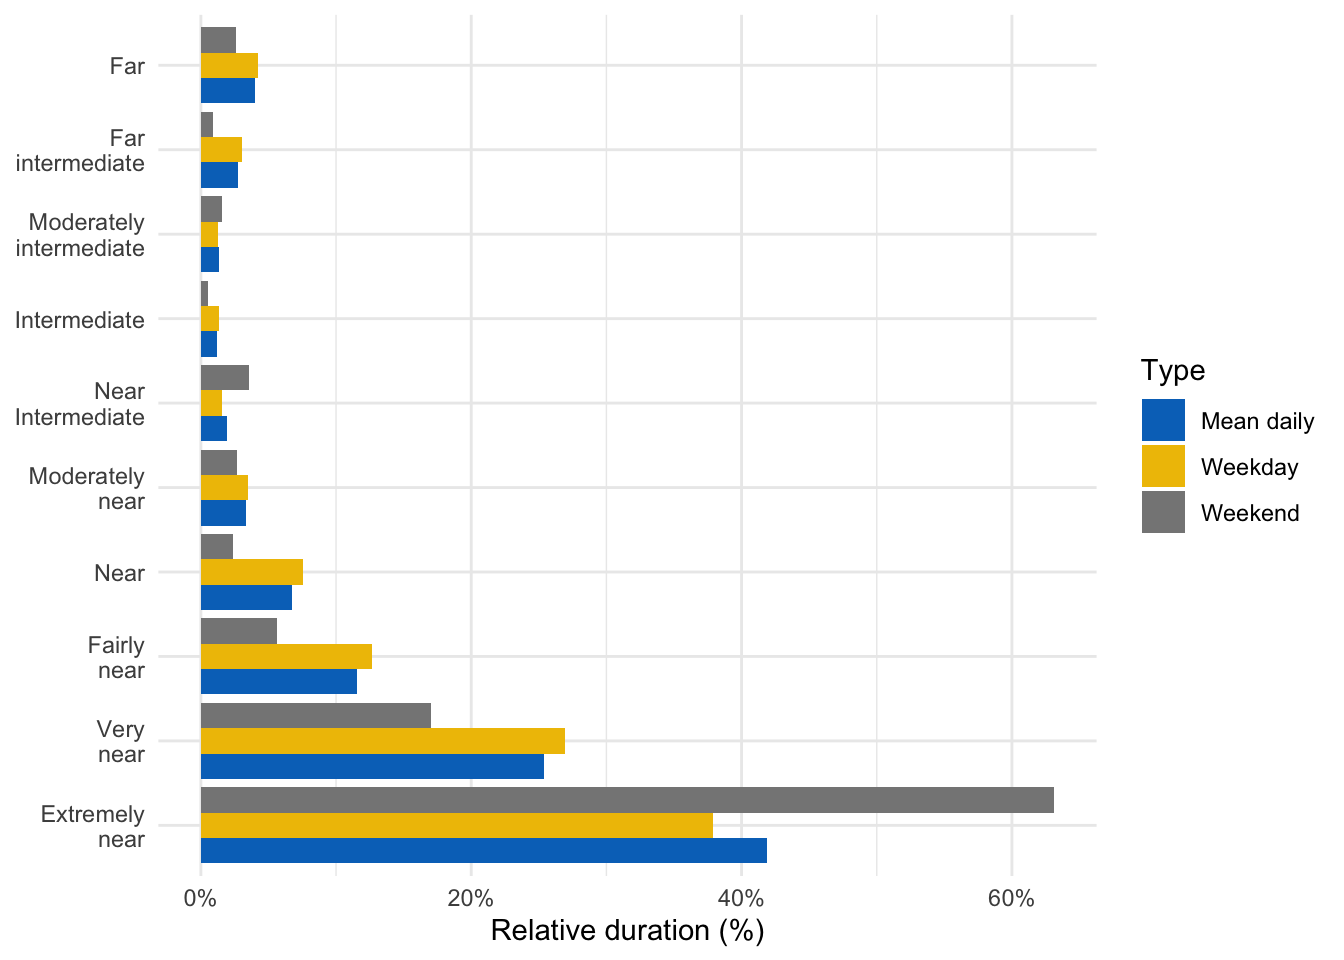
<figcaption>Figure 4: Percentage of total time in distance ranges</figcaption>
</figure>

#### 4.1.3 Frequency of Continuous near work

Continuous near work has more than one condition. Beyond a distance range, it requires a certain length, but also allows for interruptions. This is what [extract_clusters()](https://tscnlab.github.io/LightLogR/reference/extract_clusters.html) allows.

<a href="#tbl-continuousnear" class="quarto-xref">Table 7</a> summarizes the results, and <a href="#fig-cluster" class="quarto-xref">Figure 6</a> visualizes them.

In [ ]:
dataCC |> 
  extract_clusters(Dis >= 20 & Dis < 60, #define the condition
                   cluster.duration = "30 mins", #define the minimum duration
                   interruption.duration = "1 min", #define max interruption
                   drop.empty.groups = FALSE) |> #make certain days without clusters remain
  summarize_numeric(remove = c("start", "end", "epoch", "duration"),
                    add.total.duration = FALSE) |> #count the number of episodes
  mean_daily(prefix = "Frequency of ") |># daily means
  gt() |> fmt_number() #table

In [ ]:
dataCC |> 
  add_clusters(Dis >= 20 & Dis < 60, #define the condition
                   cluster.duration = "30 mins", #define the minimum duration
                   interruption.duration = "1 min") |> 
  gg_day(y.axis = Dis, y.axis.label = y.label, geom = "line") |> 
  gg_state(state, fill = "red") +
  geom_hline(yintercept = c(20, 60), col = "red", linetype = "dashed")

(`geom_line()`).

#### 4.1.4 Near Work episodes

This section of the metrics consists of three aspects: `Frequency`, `Duration`, and `Distances`. The first two aspects are collected the same way as in the previous section, whereas the `Distance` aspect is extracted from the base data. All are summarized in <a href="#tbl-nearworkepisodes" class="quarto-xref">Table 8</a>

In [ ]:
dataCC |> 
  extract_clusters(Dis >= 20 & Dis < 60, #define the condition
                   cluster.duration = "5 secs", #define the minimum duration
                   interruption.duration = "20 secs", #define max interruption
                   drop.empty.groups = FALSE) |> #make certain days without clusters remain
  extract_metric(dataCC, distance = mean(Dis, na.rm = TRUE)) |> 
  summarize_numeric(remove = c("start", "end", "epoch"), prefix = "",
                    add.total.duration = FALSE) |>  #count the number of episodes
  mean_daily(prefix = "") |> #daily means
  gt() |> fmt_number(c(distance, episodes), decimals = 0) |> #table
  cols_units(distance = "cm")

#### 4.1.5 Visual breaks

`Visual breaks` are a little different, compared to the previous metrics. The difference is that in this case, the minimum break and the previous episode is important. This leads to a two step process, where we first extract instances of `Distance` above 100 cm for at least 20 seconds, before we filter for a previous duration of at maximum 20 minutes. <a href="#tbl-visualbreaks" class="quarto-xref">Table 9</a> provides the daily frequency of visual breaks.

In [ ]:
dataCC |> 
  extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) |> 
  summarize_numeric(remove = c("start", "end", "epoch", "is.cluster", "duration"), 
                    prefix = "",
                    add.total.duration = FALSE) |>  #count the number of episodes
  mean_daily(prefix = "Daily ") |> #daily means
  gt() |> fmt_number(decimals = 1) #table

In [ ]:
dataCC |> 
    extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) %>%
  add_states(dataCC, ., ) |> 
  gg_day(y.axis = Dis, y.axis.label = y.label, geom = "line") |> 
  gg_photoperiod(coordinates) +
  geom_point(data = \(x) filter(x, is.cluster), col = "red")

(`geom_line()`).

### 4.2 Light

Illuminance values are very low in the example dataset from the `Clouclip` device, which would not yield satisfying summaries in the `Light` section. Thus, we will import data from the `VEET` device next. Because there are different modalities stored in the data, we need to specify which modality we want to access. `ALS` is the acronym for `Ambient Light Sensor`.

In [ ]:
dataCC |> 
  ggplot(aes(x=Lux)) + 
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000))

(`stat_bin()`).

In [ ]:
path <- "data/01_VEET_L.csv.zip"
tz <- "US/Central"
dataVEET <- import$VEET(path, tz = tz, modality = "ALS", manual.id = "VEET")

Multiple files in zip: reading '01_VEET_L.csv'

ℹ In argument: `dplyr::across(...)`.
Caused by warning:
! NAs introduced by coercion


Successfully read in 304'193 observations across 1 Ids from 1 VEET-file(s).
Timezone set is US/Central.
The system timezone is Europe/Berlin. Please correct if necessary!
1 observations were dropped due to a missing or non-parseable Datetime value (e.g., non-valid timestamps during DST jumps). 

First Observation: 2024-06-04 15:00:37
Last Observation: 2024-06-12 08:29:43
Timespan: 7.7 days

Observation intervals: 
  Id    interval.time              n pct      
1 VEET  0s                         1 0.00033% 
2 VEET  1s                      1957 0.64334% 
3 VEET  2s                    300147 98.67025%
4 VEET  3s                      2074 0.68181% 
5 VEET  4s                         3 0.00099% 
6 VEET  9s                         5 0.00164% 
7 VEET  10s                        3 0.00099% 
8 VEET  109s (~1.82 minutes)       1 0.00033% 
9 VEET  59077s (~16.41 hours)      1 0.00033% 

In [ ]:
dataVEET |> 
  ggplot(aes(x=Lux)) + 
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000, 10^4))

The `VEET` dataset has gaps and irregular data, similarly to the `Clouclip` data. For consistency, We will aggregate the data to 5-second intervals and set gaps explicitly. We will also remove days that have more than one hour missing data. Remaining are six days with good data coverage, as seen in <a href="#tbl-gaps2" class="quarto-xref">Table 10</a>.

In [ ]:
dataVEET <-
  dataVEET |>
  aggregate_Datetime(unit = "5 seconds") |> #aggregate to 5 second interval
  gap_handler(full.days = TRUE) |>  #set implicit gaps to explicit gaps
  add_Date_col(group.by = TRUE) |> 
  remove_partial_data(Lux, threshold.missing = "1 hour") #remove partial days

In [ ]:
dataVEET |> gap_table(Lux, "Illuminance (lx)") |>   
  cols_hide(contains("_n")) #remove the absolute number of data points

#### 4.2.1 Light exposure

Averages of light exposure can be calculated with just `summarize_numeric()`. See <a href="#tbl-lightexposure" class="quarto-xref">Table 11</a>

In [ ]:
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  to_mean_daily() |> 
  fmt_number(decimals = 1) |> cols_hide(`average episodes`) #table

As light exposure data is highly skewed and zero-inflated (see <a href="#fig-hist-VEETlight" class="quarto-xref">Figure 9</a> & ([Johannes Zauner, Guidolin, and Spitschan](#ref-ZaunerEtAl2025JBR))), a transformation is sensible for the mean to be [meaningful](https://tscnlab.github.io/LightLogR/articles/log.html). The resulting illuminance is commonly much lower, due to the skew and the influence of zero values, as can be seen in <a href="#tbl-lightexposure2" class="quarto-xref">Table 12</a>. [log_zero_inflated()](https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html) solves this by adding a small value to the dataset prior to logarithmic transformation. [exp_zero_inflated()](https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html) does the opposite.

In [ ]:
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  mutate(Lux = Lux |> log_zero_inflated()) |> #convert to logarithmic data
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  mean_daily(prefix = "") |> 
  mutate(`mean Lux` = `mean Lux` |> exp_zero_inflated()) |>
  gt() |> fmt_number(decimals = 1) |> cols_hide(episodes) #table

#### 4.2.2 Duration per outdoor range

The same way how [distance ranges](#distance-range) were calculated, illuminance ranges are summarized, displayed in <a href="#tbl-outdoor" class="quarto-xref">Table 13</a>.

In [ ]:
#cutting distance into bands
out_breaks <- c(1:3*10^3, Inf)
out_labels <- c(
    "Outdoor bright",          # [1000, 2000)
    "Outdoor very bright",     # [2000, 3000)
    "Outdoor extremely bright" # [3000, Inf)
  )

dataVEET <- 
dataVEET |> 
  mutate(Lux_range = 
           cut(Lux, breaks = out_breaks, labels = out_labels) #create ranges
         )

dataVEET |> 
  drop_na(Lux_range) |> #remove NAs
  group_by(Lux_range, .add = TRUE) |> #group by ranges
  durations(Lux) |> #calculate durations
  pivot_wider(names_from = Lux_range, values_from = duration) |> #widen data
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes") #show minutes

These states can also be easily visualized in <a href="#fig-outdoor" class="quarto-xref">Figure 10</a>.

In [ ]:
dataVEET |> 
  gg_day(y.axis = Lux, 
         y.axis.label = "Illuminance (lx)", 
         geom = "line", 
         jco_color = FALSE) |> 
  gg_state(Lux_range, aes_fill = Lux_range, alpha = 0.75) |> 
  gg_photoperiod(coordinates) +
  scale_fill_viridis_d() +
  labs(fill = "Illuminance conditions") +
  theme(legend.position = "bottom")

#### 4.2.3 Changes indoor to outdoor

To calculate the number of times a change from indoor to outdoor happens, we can extract all states where this is the case in <a href="#tbl-changesoutdoor" class="quarto-xref">Table 14</a>.

In [ ]:
dataVEET |> 
  extract_states(Outdoor, Lux >= 1000, #get all instances of states and non-states
                 group.by.state = FALSE) |> #don't group output by the state 
  filter(!lead(Outdoor), Outdoor) |>  #keep where the prior state is FALSE and current TRUE
  summarize_numeric(
    prefix = "mean ",
    remove = c("Datetime", "Outdoor", "start", "end", "duration"),
    add.total.duration = FALSE
    ) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0) |> 
  fmt_duration(`mean epoch`, input_units = "seconds", output_units = "seconds")#table

This seems rather high and is certainly influenced by the small interval of 5 seconds. Requiring that the time outside has to at least persist for 5 minutes (and slight interruptions) will bring this number down. See <a href="#tbl-changesoutdoor2" class="quarto-xref">Table 15</a> for comparison.

In [ ]:
dataVEET |> 
  extract_clusters(Lux >= 1000, #cluster conditions
                   cluster.duration = "5 min", #require 1 minute durations
                   interruption.duration = "20 secs", #allow for short interruptions
                   return.only.clusters = FALSE,
                   drop.empty.groups = FALSE) |> #get all instances of clusters and non-clusters
  filter(!lead(is.cluster), is.cluster) |>  #keep where the prior state is FALSE
  summarize_numeric(
    prefix = "mean ",
    remove = c("Datetime", "start", "end", "duration"),
    add.total.duration = FALSE
    ) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0) #table

#### 4.2.4 Longest period above 1000 lx

The last `Light` aspect from <a href="#tbl-one" class="quarto-xref">Table 1</a> is the longest period above 1000 lx (PAT1000). While this can be calculated based on what we have shown above by combining [extract_states()](https://tscnlab.github.io/LightLogR/reference/extract_states.html) with a simple filter for maximal duration, this metric provides a good opportunity to show that some aspects can also be calculated with dedicated [metric](https://tscnlab.github.io/LightLogR/articles/Metrics.html) functions in `LightLogR`. In this case, we use [period_above_threshold()](https://tscnlab.github.io/LightLogR/reference/period_above_threshold.html). The benefit of this approach is that multiple metrics can be calculated at once. Here, for example, we also calculate the duration above 1000 lx (TAT1000) alongside in <a href="#tbl-periodoutdoor" class="quarto-xref">Table 16</a>.

In [ ]:
dataVEET |> 
  summarize(
    period_above_threshold(Lux, 
                           Datetime, 
                           threshold = 1000, 
                           na.rm = TRUE, 
                           as.df = TRUE),
    duration_above_threshold(Lux,
                             Datetime,
                             threshold = 1000,
                             na.rm = TRUE,
                             as.df = TRUE),
    .groups = "keep") |> 
  to_mean_daily("")

### 4.3 Spectrum

Spectral data is not part of any of the datasets used in this article. Rather, it has to be reconstructed from sensor counts and a calibration matrix. The `VEET` device contains ten sensor channels that can be used for reconstruction. As these are contained in a different sensor than the ambient light sensor, a different modality needs to be imported from the same file. Data preparation will be analogous to [Light](#light). `PHO` contains the data from spectral sensor channels. For computational reasons, the data will be aggregated to `5 minutes` intervals. The first three rows are shown in <a href="#tbl-PHO" class="quarto-xref">Table 17</a>.

In [ ]:
dataVEET <- import$VEET(path, tz = tz, modality = "PHO", manual.id = "VEET")

Multiple files in zip: reading '01_VEET_L.csv'


Successfully read in 304'197 observations across 1 Ids from 1 VEET-file(s).
Timezone set is US/Central.
The system timezone is Europe/Berlin. Please correct if necessary!

First Observation: 2024-06-04 15:00:36
Last Observation: 2024-06-12 08:29:43
Timespan: 7.7 days

Observation intervals: 
   Id    interval.time              n pct      
 1 VEET  0s                         1 0.00033% 
 2 VEET  1s                      1753 0.57627% 
 3 VEET  2s                    300556 98.80340%
 4 VEET  3s                      1873 0.61572% 
 5 VEET  4s                         3 0.00099% 
 6 VEET  6s                         1 0.00033% 
 7 VEET  7s                         2 0.00066% 
 8 VEET  9s                         5 0.00164% 
 9 VEET  109s (~1.82 minutes)       1 0.00033% 
10 VEET  59077s (~16.41 hours)      1 0.00033% 

In [ ]:
dataVEET <-
  dataVEET |>
  aggregate_Datetime(unit = "5 mins") |> #aggregate to 5 minute intervals
  gap_handler(full.days = TRUE) |>  #set implicit gaps to explicit gaps
  add_Date_col(group.by = TRUE) |> 
  remove_partial_data(Gain, threshold.missing = "1 hour") #remove bad days

In [ ]:
dataVEET |> head(3) |> select(-c(modality, file.name, is.implicit, time_stamp)) |> 
  gt() |> fmt_number(s415:ClearR) 

The channels `s415` through `ClearR` contain raw sensor counts and need to be normalized by the `Gain` value. Further, `ClearL` and `ClearR` need to be averaged prior to spectral reconstruction. The appropriate `gain.ratio.table` for the sensor `TSL2585` is integrated in `LightLogR`, but should also be confirmed by the manufacturer.

In [ ]:
count.columns <- c("s415", "s445", "s480", "s515", "s555", "s590", "s630", 
                      "s680", "s940", "Dark", "ClearL", "ClearR") #column names
#normalize data
dataVEET <-
  dataVEET |> 
  normalize_counts( #function to normalize counts
    gain.columns = rep("Gain", 12), #all sensor channels share the gain value
    count.columns = count.columns, #senso channels to normalize
    gain.ratio.tables$TSL2585 #gain ratio channel for TSL2585 sensor
  )
#average Clear Channels
dataVEET <- 
  dataVEET |> 
  mutate(Clear.normalized = (ClearL+ClearR)/2)

#remove raw sensor counts and rename normalized values
dataVEET <-
  dataVEET |> 
    select(-c(s415:ClearR)) |> 
    rename_with(\(x) str_remove(x, ".normalized"))

This closes the necessary preparation in the dataset. The calibration matrix was provided by the manufacturer and is specific to the make and model. It should not be used for research purposes without confirming its accuracy with the manufacturer.

In [ ]:
#import calibration matrix
calib_mtx <- 
  read_csv("data/VEET_calibration_matrix.csv", show_col_types = FALSE) |> 
  column_to_rownames("wavelength") |> 
  as.matrix()

Construction the spectrum is now straightforward.

In [ ]:
dataVEET <-
  dataVEET |> 
    mutate(Spectrum = 
             spectral_reconstruction(
               sensor_channels = pick(s415:s940, Clear),
               calibration_matrix = calib_mtx
               )
           )

The dataset now contains a `list-column` containing the spectrum for each observation. We can visualize the data in <a href="#fig-spectrum" class="quarto-xref">Figure 12</a>.

In [ ]:
dataVEET |>
  unnest(Spectrum) |> #unnest the list column
  group_by(Datetime) |> #group by each spectrum
  mutate(irradiance = irradiance/max(irradiance)) |> #scale spectra relative
  ggplot(aes(x=wavelength, y = irradiance, group = Datetime)) + #plot
  geom_path(alpha = 0.15) +
  theme_minimal() +
  labs(y = "Relative spectral irradiance (%)", x = "Wavelength (nm)") + 
  scale_y_continuous(labels = scales::label_percent())+
  coord_cartesian(xlim = c(400, 700), ylim = c(0,1), expand = FALSE) +
  theme(plot.margin = margin(10,20,10,10))

(`geom_path()`).

These spectral data will be the basis to calculate the last two metrics. Note that spectrum-based metrics are less developed in scientific research, compared to, e.g., distance and light. The following two examples thus simply show theoretical use cases that can be adapted to a researchers need.

#### 4.3.1 Ratio of short vs. long wavelength light

The first spectral metric requires integration across two sections of the spectrum. [spectral_integration()](https://tscnlab.github.io/LightLogR/reference/spectral_integration.html) makes this task straight forward. The results can be seen in <a href="#tbl-ratio" class="quarto-xref">Table 18</a>

In [ ]:
dataVEET <- 
dataVEET |> 
  select(Id, Date, Datetime, Spectrum) |> 
  mutate(
    short = Spectrum |> map_dbl(spectral_integration, #short wavelength
                                   wavelength.range = c(400,500)),
    long = Spectrum |> map_dbl(spectral_integration, #long wavelength
                                  wavelength.range = c(600,700)),
    `sl ratio` = short / long # calculate the ratio
  )

In [ ]:
dataVEET |> 
  summarize_numeric(prefix = "", remove = c("Datetime", "Spectrum")) |> 
  mean_daily(prefix = "") |>
  gt() |> fmt_number(-`sl ratio`, decimals = 0) |> cols_hide(episodes) # table

#### 4.3.2 Short-wavelength light at certain times of day

For the last metric we will look at only the `short` wavelength contribution (which was already calculated in the previous section), but do so through certain times of day. <a href="#tbl-shortfilter" class="quarto-xref">Table 19</a> shows the first approach, which is about exclusively looking at local time (arbitrarily around noon). <a href="#fig-shorttime" class="quarto-xref">Figure 13</a> expands this view to all hours of the day with a binned approach. Lastly, <a href="#tbl-daytime" class="quarto-xref">Table 20</a> focuses on photoperiods.

#### Local time

``` r
dataVEET |> 
  filter_Time(start = "11:00:00", end = "14:00:00") |> #filter out certain times
  select(-c(Spectrum, long, `sl ratio`, Time, Datetime)) |> 
  summarize_numeric(prefix = "") |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(short) |> cols_label(short = "Short wavelength irradiance")
```

<div id="nlybwaxakp" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#nlybwaxakp table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#nlybwaxakp thead, #nlybwaxakp tbody, #nlybwaxakp tfoot, #nlybwaxakp tr, #nlybwaxakp td, #nlybwaxakp th {
  border-style: none;
}

#nlybwaxakp p {
  margin: 0;
  padding: 0;
}

#nlybwaxakp .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#nlybwaxakp .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#nlybwaxakp .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#nlybwaxakp .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#nlybwaxakp .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#nlybwaxakp .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#nlybwaxakp .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#nlybwaxakp .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#nlybwaxakp .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#nlybwaxakp .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#nlybwaxakp .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#nlybwaxakp .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#nlybwaxakp .gt_spanner_row {
  border-bottom-style: hidden;
}

#nlybwaxakp .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#nlybwaxakp .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#nlybwaxakp .gt_from_md > :first-child {
  margin-top: 0;
}

#nlybwaxakp .gt_from_md > :last-child {
  margin-bottom: 0;
}

#nlybwaxakp .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#nlybwaxakp .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#nlybwaxakp .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#nlybwaxakp .gt_row_group_first td {
  border-top-width: 2px;
}

#nlybwaxakp .gt_row_group_first th {
  border-top-width: 2px;
}

#nlybwaxakp .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#nlybwaxakp .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#nlybwaxakp .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#nlybwaxakp .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#nlybwaxakp .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#nlybwaxakp .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#nlybwaxakp .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#nlybwaxakp .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#nlybwaxakp .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#nlybwaxakp .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#nlybwaxakp .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#nlybwaxakp .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#nlybwaxakp .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#nlybwaxakp .gt_left {
  text-align: left;
}

#nlybwaxakp .gt_center {
  text-align: center;
}

#nlybwaxakp .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#nlybwaxakp .gt_font_normal {
  font-weight: normal;
}

#nlybwaxakp .gt_font_bold {
  font-weight: bold;
}

#nlybwaxakp .gt_font_italic {
  font-style: italic;
}

#nlybwaxakp .gt_super {
  font-size: 65%;
}

#nlybwaxakp .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#nlybwaxakp .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#nlybwaxakp .gt_indent_1 {
  text-indent: 5px;
}

#nlybwaxakp .gt_indent_2 {
  text-indent: 10px;
}

#nlybwaxakp .gt_indent_3 {
  text-indent: 15px;
}

#nlybwaxakp .gt_indent_4 {
  text-indent: 20px;
}

#nlybwaxakp .gt_indent_5 {
  text-indent: 25px;
}

#nlybwaxakp .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#nlybwaxakp div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

| Date       | Short wavelength irradiance | episodes |
|------------|-----------------------------|----------|
| VEET       |                             |          |
| Mean daily | −184.21                     | 37       |
| Weekday    | −202.23                     | 37       |
| Weekend    | −139.14                     | 37       |

</div>

Table 19: Short wavelength light exposure between 11:00 and 14:00

#### Across the day

``` r
#creating the data
dataVEETtime <-
  dataVEET |>
  cut_Datetime(unit = "1 hour", #create time sections of one hour
               type = "floor",
               group_by = TRUE) |>
  select(-c(Spectrum, long, `sl ratio`, Datetime)) |>
  summarize_numeric(prefix = "") |>
  group_by(Datetime.rounded, .drop = FALSE) |> #group by the time state
  mean_daily(prefix = "", sub.zero = TRUE) |>
  add_Time_col(Datetime.rounded) #add a time column for plotting

#creating the plot
dataVEETtime |> 
  ggplot(aes(x=Time, y = short/max(short))) +
  geom_col(aes(fill = Date), position = "dodge") +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Relative short wavelength contribution (%)", 
       x = "Local time (HH:MM)") + 
  scale_y_continuous(labels = scales::label_percent()) +
  scale_x_time(labels = scales::label_time(format = "%H:%M"))
```

<figure id="fig-shorttime">
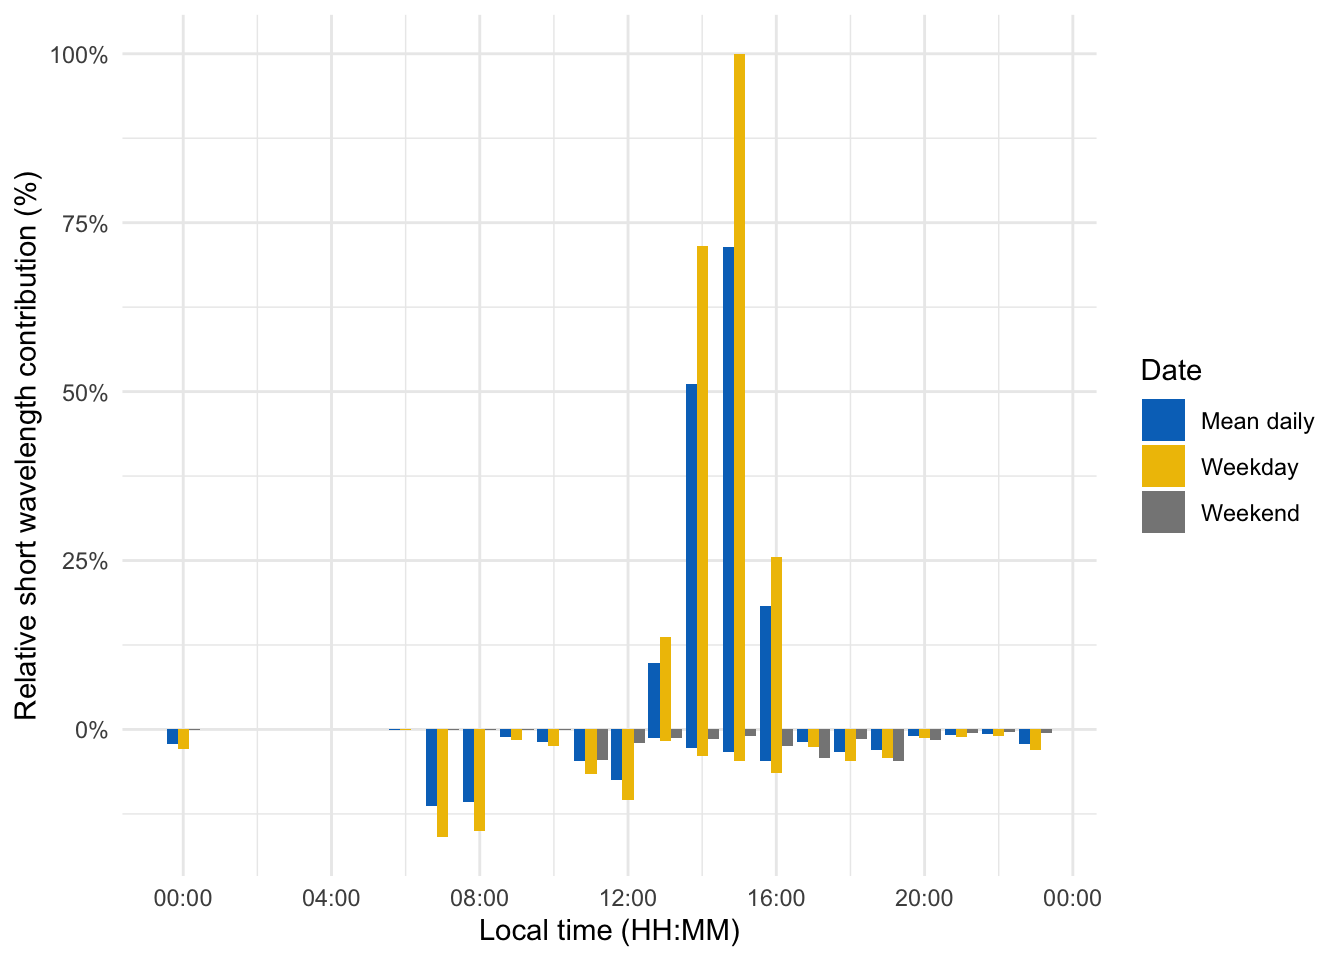
<figcaption>Figure 13: Short wavelength light exposure across the day</figcaption>
</figure>

#### Photoperiod

``` r
dataVEET |>
  select(-c(Spectrum, long, `sl ratio`)) |>
  add_photoperiod(coordinates) |> 
  group_by(photoperiod.state, .add = TRUE) |> 
  summarize_numeric(prefix = "", 
                    remove = c("dawn", "dusk", "photoperiod", "Datetime")) |> 
  group_by(photoperiod.state) |> 
  mean_daily(prefix = "") |> 
  select(-episodes) |> 
  pivot_wider(names_from =photoperiod.state, values_from = short) |> 
  gt() |> fmt_number()
```

<div id="yonlagokig" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#yonlagokig table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#yonlagokig thead, #yonlagokig tbody, #yonlagokig tfoot, #yonlagokig tr, #yonlagokig td, #yonlagokig th {
  border-style: none;
}

#yonlagokig p {
  margin: 0;
  padding: 0;
}

#yonlagokig .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#yonlagokig .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#yonlagokig .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#yonlagokig .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#yonlagokig .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#yonlagokig .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#yonlagokig .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#yonlagokig .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#yonlagokig .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#yonlagokig .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#yonlagokig .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#yonlagokig .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#yonlagokig .gt_spanner_row {
  border-bottom-style: hidden;
}

#yonlagokig .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#yonlagokig .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#yonlagokig .gt_from_md > :first-child {
  margin-top: 0;
}

#yonlagokig .gt_from_md > :last-child {
  margin-bottom: 0;
}

#yonlagokig .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#yonlagokig .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#yonlagokig .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#yonlagokig .gt_row_group_first td {
  border-top-width: 2px;
}

#yonlagokig .gt_row_group_first th {
  border-top-width: 2px;
}

#yonlagokig .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#yonlagokig .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#yonlagokig .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#yonlagokig .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#yonlagokig .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#yonlagokig .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#yonlagokig .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#yonlagokig .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#yonlagokig .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#yonlagokig .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#yonlagokig .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#yonlagokig .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#yonlagokig .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#yonlagokig .gt_left {
  text-align: left;
}

#yonlagokig .gt_center {
  text-align: center;
}

#yonlagokig .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#yonlagokig .gt_font_normal {
  font-weight: normal;
}

#yonlagokig .gt_font_bold {
  font-weight: bold;
}

#yonlagokig .gt_font_italic {
  font-style: italic;
}

#yonlagokig .gt_super {
  font-size: 65%;
}

#yonlagokig .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#yonlagokig .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#yonlagokig .gt_indent_1 {
  text-indent: 5px;
}

#yonlagokig .gt_indent_2 {
  text-indent: 10px;
}

#yonlagokig .gt_indent_3 {
  text-indent: 15px;
}

#yonlagokig .gt_indent_4 {
  text-indent: 20px;
}

#yonlagokig .gt_indent_5 {
  text-indent: 25px;
}

#yonlagokig .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#yonlagokig div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

| Date       | day    | night  |
|------------|--------|--------|
| Mean daily | 80.14  | −27.73 |
| Weekday    | 140.09 | −33.96 |
| Weekend    | −69.73 | −12.17 |

</div>

Table 20: Short wavelength light exposure during the day and at night

## 5 Discussion and conclusion

This tutorial demonstrates how to calculate various metrics used in current and future research in a principled and standardized approach. While not brief overall, each metric has a dedicated pipeline that is verbose and comparatively easy to follow at each step. Those pipelines utilize `LightLogR`s framework and combine that with common data analysis workflows. The goal is to make the process transparent (function definitions open source), accessible (sound documentation, tutorials, speaking function and argument names, MIT license), robust (~900 unit tests for functions, continuous integration on GitHub, bug-tracking on Github), and community-driven (feature tracking on GitHub, open process for researchers who want to contribute code or suggest features).

The tutorial also demonstrates that even through these standardized pipelines, there are many decisions a researcher has to make (and document) to clean data, deal with measurement epochs, and calculate chosen metrics, especially where clusters of data are concerned, i.e., data are grouped in more than one dimension (e.g., by distance range, and minimal duration).

The slew of features aimed to explore the data and extracted metrics or clusters in plots and tables, and to handle measurement intervals, gaps, and irregular data, make `LightLogR` an excellent choice for the research field of visual experience, be it in circadian, myopia, or related fields of research.

## 6 Session info

In [ ]:
sessionInfo()

R version 4.5.0 (2025-04-11)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Berlin
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] gt_1.0.0        LightLogR_0.9.2 lubridate_1.9.4 forcats_1.0.0  
 [5] stringr_1.5.1   dplyr_1.1.4     purrr_1.0.4     readr_2.1.5    
 [9] tidyr_1.3.1     tibble_3.3.0    ggplot2_3.5.2   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] gtable_0.3.6       xfun_0.52          htmlwidgets_1.6.4  tzdb_0.5.0        
 [5] vctrs_0.6.5        tools_4.5.0        generics_0.1.4     parallel_4.5.0    
 [9] proxy

## 7 References

```` markdown
---
title: "Tutorial on analysis pipelines for visual experience datasets"
author: "Johannes Zauner, Aaron Nicholls, Lisa Ostrin, and Manuel Spitschan"
format:
  html:
    toc: true
    number-sections: true
    code-tools: true
    html-math-method:
      method: mathjax
      url: "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.9/latest.js?config=TeX-MML-AM_CHTML"
bibliography: references.bib
lightbox: true
execute:
  echo: true
---

## Abstract

This tutorial presents an analysis pipeline for visual experience datasets, with a focus on reproducible workflows tailored for use in human chronobiology and myopia research. Light exposure and its retinal encoding affect human physiology and behaviour over various time scales. Here, we provide step-by-step instructions for importing, visualising, and processing data for viewing distance and light exposure data using the open-source tool LightLogR. This includes time-series analysis for working distance, spectral characteristics, and biologically relevant light metrics. By leveraging a modular approach, this tutorial supports researchers in building flexible and robust pipelines that can accommodate diverse experimental paradigms and measurement systems.


## Introduction

Exposure to the optical environment — often referred to as visual experience — profoundly influences human physiology and behaviour across multiple time scales. Two notable examples, though from distinct research domains, can be understood through a common, retinally-referenced conceptual framework.

The first relates to the non-visual effects of light on human circadian and neuroendocrine physiology. The light–dark cycle entrains the circadian clock, and light exposure during the night suppresses melatonin production [@Brown2022PLoSBiol; @Blume2019Somnologie].

The second concerns the influence of visual experience on ocular development, particularly myopia. Time spent outdoors — characterised by distinct optical environments — has been consistently associated with protective effects on ocular growth and health outcomes [@DahlmannNoor2025GraefesArchClinExpOphthal].

In controlled laboratory settings, light exposure can be held constant or manipulated parametrically. However, such exposures rarely replicate real-world conditions, which are inherently complex and dynamic. As people move in and between spaces (indoors and outdoors) and move their body, head, and eyes, the exposure to the optical environment varies significantly [@Webler2019CurrOpinBehavSci], and is modulated by behaviour [@Biller2024CommunPsychol]. Wearable devices for measuring light exposure have thus emerged as vital tools in capturing the richness of ecological visual experience. These tools generate high-dimensional datasets that demand rigorous and flexible analysis strategies.

Starting in the 1980s [@Okudaira1983AmJPhysiol], technology to measure exposure to the optical environment has been developed and matured, with miniaturized illuminance sensors now (2025) being very common in consumer smartwatches. In research, several device and device types are available, which differ in their functionality, ranging from small pin-like devices measuring light exposure [@Mohamed2021OptExpress] to head-mounted multi-modal measurement devices capturing almost all relevant aspects of visual experience [@Gibaldi2024TranslVisSciTechnol]. With the increased technical capabilities in wearables come considerably complex and dense datasets. These go hand in hand with a significant number of metrics, as revealed by review papers, in both fields.

At present, the analysis processes to derive metrics are often implemented on a by-workgroup, or even by-researcher basis, which is both a potential source of errors and inconsistencies between publications, and also a considerable time sink for researchers [@Hartmeyer2022LightResTechnol]. Too often, more time is spent preparing the data than in actually gaining insights through rigoruous statistical testing and exploration. The preparation tasks are best handled, or at least facilitated, by standardized, transparent, and community-based pipelines for analysis [@Zauner2024PLOSONE].

In circadian research, the package LightLogR for R statistical software was developed [@Zauner2025JOpenSourceSoftw]. LightLogR is an open-source, MIT licensed, and community-driven package specifically made to work with data from wearable light loggers and optical radiation dosimeters. It also contains functions to calculate over sixty different metrics used in the field [@Hartmeyer2023LightResTechnol]. In a recent [update](https://tscnlab.github.io/LightLogR/news/index.html#lightlogr-090-sunrise) the package was significantly expanded to deal with modalities beyond illuminance, like distance or even light spectra, which are highly relevant for myopia research [@Honekopp2023ClinOphthalmol]. 

In this article we show that the analysis pipelines and metric functions in LightLogR naturally apply to the whole field of visual experience, not just circadian research and chronobiology. Our approach is modular and extensible, allowing researchers to adapt it to a variety of devices and research questions. Emphasis is placed on clarity, transparency, and reproducibility, aligning with best practices in scientific computing and open science. We use data from two devices to demonstrate the LightLogR workflow and output with metrics relevant in the field of myopia, covering metrics for working distance, daylight exposure, and spectral analyses. It is recommended to recreate the analysis in this script. All necessary data and code are provided under an open license in the [GitHub repository](https://github.com/tscnlab/ZaunerEtAl2025JOV).

## Methods and materials

### Software

This tutorial is built with `Quarto`, an open-source scientific and technical publishing system, integrating text, code, and code-output into a single document. The source-code to reproduce the outcomes is part of the document and accessible via the `code-tools` menu.

Package `LightLogR` (Version 0.9.1 "Sunrise") was used with R statistical software (Version 4.4.3 "Trophy Case"). We further used the `tidyverse` package (Version 2.0.0) for principled data analysis, which `LightLogR` follows. Finally, the `gt` package (Version 1.0.0) was used for table generation. A comprehensive overview of the R computing environment can be found in the [session info](#sessioninfo)

### Metric selection and definitions

In March of 2025, two workshops with researchers in the field of myopia, initiated by the Research Data Alliance (RDA) Working Group on Optical Radiation Exposure and Visual Experience Data focused on the current needs and future opportunities regarding data analysis, including metrics. Out of the expert inputs in these workshops, a list of visual experience metrics was collected, which is shown in @tbl-one. These include currently used metrics and definitions [@Wen2020bjophthalmol; @Wen2019TransVisSciTech; @Bhandari2020OphthalmicPhysiolOpt; @Williams2019Scientificreports], but also new metrics that are possible through spectrally-resolved measurements.

{{< include _Table1.qmd >}}

@tbl-two contains definitions for the terms in @tbl-one. Note that these definitions may vary depending on the research question or device capabilities.

{{< include _Table2.qmd >}}

### Devices

Data from two devices will be used for analysis:

-   Distance and light metrics will be calculated based on export from the `Clouclip` device [Glasson Technology Co., Ltd, Hangzhou, China, @Wen2021ActaOphtalmol; @Wen2020bjophthalmol]. This device has a simple output of only `Distance` and `Illuminance` measurements. Data were recorded in `5-second intervals`. A weeks worth of data takes up about 1.6 MB of storage.

-   Spectrum metrics will be calculated using data from a multi-modal device, the `Visual Environment Evaluation Tool` or `VEET` [Meta Platforms, Inc., Menlo Park, California, USA, @Sah2025OphtalmicPhysiolOpt]. This dense dataset contains distance (spatially resolved), light, activity (accellerometer & gyroscope), and spectrum measurements, recorded in `2-second intervals`. A weeks worth of data takes up about 270 MB of storage.

### Data import & preparation

This tutorial will start by importing a `Clouclip` dataset and providing an overview of the data. The `Clouclip` export is considerably simpler compared to the `VEET` export, only containing `Distance` and `Illuminance` measurements. The `VEET` dataset will be imported later for the spectrum related metrics.

quarto-executable-code-5450563D

```r
#| label: setup
#| output: false
# load libraries
library(tidyverse)
library(LightLogR)
library(gt)
```

`LightLogR` provides accessible import functionality for many wearable devices (18 at the time of writing). Required information are the file(s) and the time zone the device was set up with/recorded in (default is `UTC`). Many optional arguments let a user, e.g., extract `ID`s from the file name or correct for daylight savings jumps. The import also provides a comprehensive overview of the data, letting the user know of any gaps and irregularities in the data.

quarto-executable-code-5450563D

```r
#| label: fig-importCC
#| fig-cap: "Overview plot of imported Clouclip data"
#| fig-height: 2
#| fig-width: 6
# import the data
path <- "data/Sample_Clouclip.csv"
tz <- "US/Central"
dataCC <- import$Clouclip(path, tz = tz, manual.id = "Clouclip")
```

#### Exploration

Any dataset may conain gaps. The example `Clouclip` dataset here has many gaps in the data (see @fig-importCC). Understanding how these relate to the measurements and the time of recording is essential. `LightLogR` provides tools to visualize and summarize these gaps.

In the presence of irregular data, i.e. data that does not fall in a regular sequence of datetimes, gap summaries can be computationally very expensive and inaccurate. For that reason, if it is not already visible from the import summary, it makes sense to check for irregular data.

quarto-executable-code-5450563D

```r
#| label: irregular
dataCC |> has_irregulars() #test for irregulars
```

In the case of irregular data, it is recommended to visualize irregulars without recalculating implicit gaps, which are missing observations at regular intervals. See @fig-irregular.

quarto-executable-code-5450563D

```r
#| label: fig-irregular
#| fig-height: 12
#| warning: false
#| fig-cap: "Visualization of gaps and irregular data. Black traces show available data. Red shaded areas show times of missing data. Red dots show instances where observations occur off the regular interval from start to finish, i.e., irregular data."
y.label <- "Distance (cm)"
dataCC |> gg_gaps(Dis, 
                  include.implicit.gaps = FALSE,
                  show.irregulars = TRUE,
                  y.axis.label = y.label,
                  group.by.days = TRUE
                  ) + labs(title = NULL)
```

In @fig-irregular, it looks like data in every day but the first and last are considered irregular. This happens with some devices and requires manual handling. Strategies include:

-   Removing some intervals from the start if the irregularities are due to the setup process. See [filter_Date() / filter_Datetime()](https://tscnlab.github.io/LightLogR/reference/filter_Datetime.html) for a way to remove these. This is usually a good solution if only the first day has regular data and the rest is all irregular.

-   Rounding datetime values to the closest (5 second) interval. See [cut_Datetime()](https://tscnlab.github.io/LightLogR/reference/cut_Datetime.html) for a helper function. This is appropriate if deviations from the dominant interval (5 seconds in this case) are infrequent and if rounded datetimes don't lead to duplicated datetetimes.

-   Aggregating data into a coarser recording interval. See [aggregate_Datetime()](https://tscnlab.github.io/LightLogR/reference/aggregate_Datetime.html) for this option. This is appropriate in most cases, but leads to a loss in granularity.

Based on the import summary, and the graph, we use the second option to deal with the irregular data.

quarto-executable-code-5450563D

```r
# round observation times to the next 5-second interval
dataCC <-
  dataCC |>
  cut_Datetime("5 secs", New.colname = Datetime) |> 
  add_Date_col(group.by = TRUE)
```

quarto-executable-code-5450563D

```r
#| label: tbl-gaps
#| tbl-cap: "Summary of missing and observed data for the Clouclip device"
# summarize the data
dataCC |> gap_table(Dis, Variable.label = "Distance (cm)") |> 
  cols_hide(contains("_n")) #remove the absolute number of data points
```

@tbl-gaps shows that there are no more irregular data after treatment. There are, however, considerable implicitly missing data, which can be converted to explicitly missing data with [gap_handler()](https://tscnlab.github.io/LightLogR/reference/gap_handler.html), which will make calculations based on the dataset much more robust. Furthermore, there are two days that have less than an hours worth of data. These will be removed.

quarto-executable-code-5450563D

```r
#make implicit gaps explicit
dataCC <- 
  dataCC |> 
  #add the operational tag to have all rows with a status:
  mutate(across(c(Lux_status, Dis_status), \(x) replace_na(x, "operational"))) |> 
  #make gaps explicit:
  gap_handler(full.days = TRUE) |>  
  #remove days that have less than one hour of data
  remove_partial_data(Dis, threshold.missing = "23 hours")
```

The `Clouclip` device uses sentinel values[^sentinel] to encode states in the measurement values. `LightLogR` converts these to a dedicated column upon import, and we can visualize them, alongside showing the photoperiod.

[^sentinel]: In programming, a sentinel value is a special, unique value used to signal a condition. It is distinct from regular data values and acts as a marker.

quarto-executable-code-5450563D

```r
#| fig-height: 8
#| warning: false
#| label: fig-state
#| fig-cap: "Distance measurements across days. Blue, grey and yellow-colored areas show sentinel states of the device. Blue indicates an operational status, grey sleep mode (not recording), and yellow an out of range measurement. Red boxed areas show nighttime from civil dusk until dawn, which are calculated based on the recording date and geographic coordinates"
#setting coordinates for Houston, Texas
coordinates <- c(29.75, -95.36)
# visualize observations
dataCC |> 
  fill(c(Lux_status, Dis_status), .direction = "downup") |> 
  gg_day(y.axis = Dis, geom = "line", y.axis.label = y.label) |> #create a basic plot
  gg_state(Dis_status, aes_fill = Dis_status) |> #add the status times
  gg_photoperiod(coordinates, alpha = 0.1, col = "red") + #add the photoperiod (day/night)
  theme(legend.position = "bottom")
```

With these data, the metrics can be calculated.

## Results

### Distance

In the following sections, daily values are calculated. The following helper function takes these daily values and calculates averages for `weekend`, `weekday`, and `mean daily`:

quarto-executable-code-5450563D

```r
to_mean_daily <- function(data, prefix = "average_") {
  data |> 
    ungroup(Date) |> #ungroup by days
    mean_daily(prefix = prefix) |> #calculate the averages
    rename_with(.fn = \(x) str_replace_all(x,"_"," ")) |> #remove underscores
    gt() #table output
}
```

#### Total wear time daily

For `Total wear time daily`, only instances where there is actual distance data available will be taken into account in @tbl-wear.

quarto-executable-code-5450563D

```r
#| label: tbl-wear
#| tbl-cap: "Total wear time daily"
dataCC |> 
  durations(Dis) |> #calculate the durations per group (day)
  to_mean_daily("Total wear ")
```

#### Duration within distance ranges {#distance-range}

This metric can be calculated in two ways. @tbl-nearwork shows the `duration of near work`, whereas @tbl-ranges shows the `duration of distance ranges`.

::: {.panel-tabset}

##### Duration of near work

quarto-executable-code-5450563D

```r
#| label: tbl-nearwork
#| tbl-cap: "Duration of near work"
dataCC |> 
  filter(Dis >= 10, Dis < 60) |> 
  durations(Dis) |> 
  to_mean_daily("Near work ")
```

##### Duration within distance ranges

quarto-executable-code-5450563D

```r
#defining distance ranges
dist_breaks <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, Inf)
dist_labels <- c(
    "Extremely near",          # [10, 20)
    "Very near",               # [20, 30)
    "Fairly near",             # [30, 40)
    "Near",                    # [40, 50)
    "Moderately near",         # [50, 60)
    "Near Intermediate",       # [60, 70)
    "Intermediate",            # [70, 80)
    "Moderately intermediate", # [80, 90)
    "Far intermediate",        # [90, 100)
    "Far"                      # [100, Inf)
  )
```


quarto-executable-code-5450563D

```r
#| label: tbl-ranges
#| tbl-cap: "Duration in distance ranges"
dataCC |> 
  mutate(Dis_range = 
           cut(Dis, breaks = dist_breaks, labels = dist_labels) #create ranges
         ) |> 
  drop_na(Dis_range) |> #remove NAs
  group_by(Dis_range, .add = TRUE) |> #group by ranges
  durations(Dis) |> #calculate durations
  pivot_wider(names_from = Dis_range, values_from = duration) |> #widen data
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes") #show minutes
```

@fig-ranges shows the distribution of relative times within each distance range.

quarto-executable-code-5450563D

```r
#| label: fig-ranges
#| fig-cap: "Percentage of total time in distance ranges"
#| echo: false
dataCC |> 
  mutate(Dis_range = 
           cut(Dis, breaks = dist_breaks, labels = dist_labels) #create ranges
         ) |> 
  drop_na(Dis_range) |> #remove NAs
  group_by(Dis_range, .add = TRUE) |> #group by ranges
  durations(Dis) |> 
  group_by(Dis_range) |> 
  mean_daily(prefix = "") |> 
  ungroup() |> 
  mutate(Dis_range = 
           forcats::fct_relabel(Dis_range, \(x) str_replace(x, " ", "\n"))) |> 
  mutate(duration = duration/sum(duration), .by = Date) |> 
  ggplot(aes(x=Dis_range, y = duration, fill = Date)) +
  geom_col(, position = "dodge") +
  scale_y_continuous(labels = scales::label_percent()) +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Relative duration (%)", x = NULL, fill = "Type") +
  coord_flip()
```

:::

#### Frequency of Continuous near work

Continuous near work has more than one condition. Beyond a distance range, it requires a certain length, but also allows for interruptions. This is what [extract_clusters()](https://tscnlab.github.io/LightLogR/reference/extract_clusters.html) allows.

@tbl-continuousnear summarizes the results, and @fig-cluster visualizes them.

quarto-executable-code-5450563D

```r
#| label: tbl-continuousnear
#| tbl-cap: "Frequency of continuous near work"
dataCC |> 
  extract_clusters(Dis >= 20 & Dis < 60, #define the condition
                   cluster.duration = "30 mins", #define the minimum duration
                   interruption.duration = "1 min", #define max interruption
                   drop.empty.groups = FALSE) |> #make certain days without clusters remain
  summarize_numeric(remove = c("start", "end", "epoch", "duration"),
                    add.total.duration = FALSE) |> #count the number of episodes
  mean_daily(prefix = "Frequency of ") |># daily means
  gt() |> fmt_number() #table
```

quarto-executable-code-5450563D

```r
#| label: fig-visbreak
#| fig-cap: "Continuous near work episodes (red shaded areas). Black traces show measurement data, and two red dashed lines indicate the range of near work between 20 and 60 cm distance"
#| warning: false
#| fig-height: 8
dataCC |> 
  add_clusters(Dis >= 20 & Dis < 60, #define the condition
                   cluster.duration = "30 mins", #define the minimum duration
                   interruption.duration = "1 min") |> 
  gg_day(y.axis = Dis, y.axis.label = y.label, geom = "line") |> 
  gg_state(state, fill = "red") +
  geom_hline(yintercept = c(20, 60), col = "red", linetype = "dashed")
```

#### Near Work episodes

This section of the metrics consists of three aspects: `Frequency`, `Duration`, and `Distances`. The first two aspects are collected the same way as in the previous section, whereas the `Distance` aspect is extracted from the base data. All are summarized in @tbl-nearworkepisodes

quarto-executable-code-5450563D

```r
#| label: tbl-nearworkepisodes
#| tbl-cap: "Frequency, duration, and distance of near work episodes"
dataCC |> 
  extract_clusters(Dis >= 20 & Dis < 60, #define the condition
                   cluster.duration = "5 secs", #define the minimum duration
                   interruption.duration = "20 secs", #define max interruption
                   drop.empty.groups = FALSE) |> #make certain days without clusters remain
  extract_metric(dataCC, distance = mean(Dis, na.rm = TRUE)) |> 
  summarize_numeric(remove = c("start", "end", "epoch"), prefix = "",
                    add.total.duration = FALSE) |>  #count the number of episodes
  mean_daily(prefix = "") |> #daily means
  gt() |> fmt_number(c(distance, episodes), decimals = 0) |> #table
  cols_units(distance = "cm")
```

#### Visual breaks

`Visual breaks` are a little different, compared to the previous metrics. The difference is that in this case, the minimum break and the previous episode is important. This leads to a two step process, where we first extract instances of `Distance` above 100 cm for at least 20 seconds, before we filter for a previous duration of at maximum 20 minutes. @tbl-visualbreaks provides the daily frequency of visual breaks.

quarto-executable-code-5450563D

```r
#| label: tbl-visualbreaks
#| tbl-cap: "Frequency of visual breaks"
dataCC |> 
  extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) |> 
  summarize_numeric(remove = c("start", "end", "epoch", "is.cluster", "duration"), 
                    prefix = "",
                    add.total.duration = FALSE) |>  #count the number of episodes
  mean_daily(prefix = "Daily ") |> #daily means
  gt() |> fmt_number(decimals = 1) #table
```

quarto-executable-code-5450563D

```r
#| label: fig-cluster
#| fig-cap: "Plot of visual breaks (red dots). Black traces show distance measurement data. Grey shaded areas show nighttime between civil dusk and civil dawn"
#| warning: false
#| fig-height: 8
dataCC |> 
    extract_clusters(Dis >= 100, #define the condition, greater 100 cm away
                   cluster.duration = "20 secs", #define the minimum duration
                   return.only.clusters = FALSE, #return non-clusters as well
                   drop.empty.groups = FALSE #keep all days, even without clusters
                   ) |> 
  # return only clusters with previous episode lengths of maximum 20 minutes:
  filter((start - lag(end) <= duration("20 mins")), is.cluster) %>%
  add_states(dataCC, ., ) |> 
  gg_day(y.axis = Dis, y.axis.label = y.label, geom = "line") |> 
  gg_photoperiod(coordinates) +
  geom_point(data = \(x) filter(x, is.cluster), col = "red")
```


### Light {#light}

Illuminance values are very low in the example dataset from the `Clouclip` device, which would not yield satisfying summaries in the `Light` section. Thus, we will import data from the `VEET` device next. Because there are different modalities stored in the data, we need to specify which modality we want to access. `ALS` is the acronym for `Ambient Light Sensor`.

quarto-executable-code-5450563D

```r
#| label: fig-hist-CClight
#| column: margin
#| echo: false
#| fig-cap: "Histogram of Clouclip light data"
dataCC |> 
  ggplot(aes(x=Lux)) + 
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000))
```
  

quarto-executable-code-5450563D

```r
#| label: fig-VEET-overview
#| fig-cap: "Overview plot of imported VEET data"
#| fig-height: 2
#| fig-width: 6
path <- "data/01_VEET_L.csv.zip"
tz <- "US/Central"
dataVEET <- import$VEET(path, tz = tz, modality = "ALS", manual.id = "VEET")
```


quarto-executable-code-5450563D

```r
#| label: fig-hist-VEETlight
#| column: margin
#| echo: false
#| fig-cap: "Histogram of VEET light data"
dataVEET |> 
  ggplot(aes(x=Lux)) + 
  geom_histogram(bins = 100) + 
  theme_minimal() +
  scale_x_continuous(trans = "symlog", breaks = c(0, 1, 10, 100, 1000, 10^4))
```

The `VEET` dataset has gaps and irregular data, similarly to the `Clouclip` data. For consistency, We will aggregate the data to 5-second intervals and set gaps explicitly. We will also remove days that have more than one hour missing data. Remaining are six days with good data coverage, as seen in @tbl-gaps2.

quarto-executable-code-5450563D

```r
dataVEET <-
  dataVEET |>
  aggregate_Datetime(unit = "5 seconds") |> #aggregate to 5 second interval
  gap_handler(full.days = TRUE) |>  #set implicit gaps to explicit gaps
  add_Date_col(group.by = TRUE) |> 
  remove_partial_data(Lux, threshold.missing = "1 hour") #remove partial days
```


quarto-executable-code-5450563D

```r
#| label: tbl-gaps2
#| tbl-cap: "Summary of missing and observed data for the VEET device"
dataVEET |> gap_table(Lux, "Illuminance (lx)") |>   
  cols_hide(contains("_n")) #remove the absolute number of data points
```

#### Light exposure

Averages of light exposure can be calculated with just `summarize_numeric()`. See @tbl-lightexposure

quarto-executable-code-5450563D

```r
#| label: tbl-lightexposure
#| tbl-cap: "Light exposure (mean) without transformation"
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  to_mean_daily() |> 
  fmt_number(decimals = 1) |> cols_hide(`average episodes`) #table
```

As light exposure data is highly skewed and zero-inflated (see @fig-hist-VEETlight & [@ZaunerEtAl2025JBR]), a transformation is sensible for the mean to be [meaningful](https://tscnlab.github.io/LightLogR/articles/log.html). The resulting illuminance is commonly much lower, due to the skew and the influence of zero values, as can be seen in @tbl-lightexposure2. [log_zero_inflated()](https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html) solves this by adding a small value to the dataset prior to logarithmic transformation. [exp_zero_inflated()](https://tscnlab.github.io/LightLogR/reference/log_zero_inflated.html) does the opposite.

quarto-executable-code-5450563D

```r
#| label: tbl-lightexposure2
#| tbl-cap: "Light exposure (mean) with logarithmic transformation"
dataVEET |> 
  select(Id, Date, Datetime, Lux) |> 
  mutate(Lux = Lux |> log_zero_inflated()) |> #convert to logarithmic data
  summarize_numeric(prefix = "mean ", remove = c("Datetime")) |> 
  mean_daily(prefix = "") |> 
  mutate(`mean Lux` = `mean Lux` |> exp_zero_inflated()) |>
  gt() |> fmt_number(decimals = 1) |> cols_hide(episodes) #table
```

#### Duration per outdoor range

The same way how [distance ranges](#distance-range) were calculated, illuminance ranges are summarized, displayed in @tbl-outdoor.

quarto-executable-code-5450563D

```r
#| label: tbl-outdoor
#| tbl-cap: "Duration in outdoor ranges"
#cutting distance into bands
out_breaks <- c(1:3*10^3, Inf)
out_labels <- c(
    "Outdoor bright",          # [1000, 2000)
    "Outdoor very bright",     # [2000, 3000)
    "Outdoor extremely bright" # [3000, Inf)
  )

dataVEET <- 
dataVEET |> 
  mutate(Lux_range = 
           cut(Lux, breaks = out_breaks, labels = out_labels) #create ranges
         )

dataVEET |> 
  drop_na(Lux_range) |> #remove NAs
  group_by(Lux_range, .add = TRUE) |> #group by ranges
  durations(Lux) |> #calculate durations
  pivot_wider(names_from = Lux_range, values_from = duration) |> #widen data
  to_mean_daily("") |> 
  fmt_duration(input_units = "seconds", output_units = "minutes") #show minutes
```

These states can also be easily visualized in @fig-outdoor.

quarto-executable-code-5450563D

```r
#| fig-height: 8
#| warning: false
#| label: fig-outdoor
#| fig-cap: "Outdoor ranges throughout the measurement period. Colored areas indicate times of outdoor lighting conditions. Violett indicates values above 1000 lx, green above 2000 lx, and yellow above 3000 lx. Grey shaded areas indicate nighttime from civil dusk to civil dawn"
dataVEET |> 
  gg_day(y.axis = Lux, 
         y.axis.label = "Illuminance (lx)", 
         geom = "line", 
         jco_color = FALSE) |> 
  gg_state(Lux_range, aes_fill = Lux_range, alpha = 0.75) |> 
  gg_photoperiod(coordinates) +
  scale_fill_viridis_d() +
  labs(fill = "Illuminance conditions") +
  theme(legend.position = "bottom")
```

#### Changes indoor to outdoor

To calculate the number of times a change from indoor to outdoor happens, we can extract all states where this is the case in @tbl-changesoutdoor.

quarto-executable-code-5450563D

```r
#| label: tbl-changesoutdoor
#| tbl-cap: "Number of times light levels change from indoor (<1000 lx) to outdoor (>1000 lx)"
dataVEET |> 
  extract_states(Outdoor, Lux >= 1000, #get all instances of states and non-states
                 group.by.state = FALSE) |> #don't group output by the state 
  filter(!lead(Outdoor), Outdoor) |>  #keep where the prior state is FALSE and current TRUE
  summarize_numeric(
    prefix = "mean ",
    remove = c("Datetime", "Outdoor", "start", "end", "duration"),
    add.total.duration = FALSE
    ) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0) |> 
  fmt_duration(`mean epoch`, input_units = "seconds", output_units = "seconds")#table
```

This seems rather high and is certainly influenced by the small interval of 5 seconds. Requiring that the time outside has to at least persist for 5 minutes (and slight interruptions) will bring this number down. See @tbl-changesoutdoor2 for comparison.

quarto-executable-code-5450563D

```r
#| label: tbl-changesoutdoor2
#| tbl-cap: "Number of times light levels change from indoor (<1000 lx) to outdoor (>1000 lx) for at least 5 minutes"
dataVEET |> 
  extract_clusters(Lux >= 1000, #cluster conditions
                   cluster.duration = "5 min", #require 1 minute durations
                   interruption.duration = "20 secs", #allow for short interruptions
                   return.only.clusters = FALSE,
                   drop.empty.groups = FALSE) |> #get all instances of clusters and non-clusters
  filter(!lead(is.cluster), is.cluster) |>  #keep where the prior state is FALSE
  summarize_numeric(
    prefix = "mean ",
    remove = c("Datetime", "start", "end", "duration"),
    add.total.duration = FALSE
    ) |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(episodes, decimals = 0) #table
```

#### Longest period above 1000 lx

The last `Light` aspect from @tbl-one is the longest period above 1000 lx (PAT1000). While this can be calculated based on what we have shown above by combining [extract_states()](https://tscnlab.github.io/LightLogR/reference/extract_states.html) with a simple filter for maximal duration, this metric provides a good opportunity to show that some aspects can also be calculated with dedicated [metric](https://tscnlab.github.io/LightLogR/articles/Metrics.html) functions in `LightLogR`. In this case, we use [period_above_threshold()](https://tscnlab.github.io/LightLogR/reference/period_above_threshold.html). The benefit of this approach is that multiple metrics can be calculated at once. Here, for example, we also calculate the duration above 1000 lx (TAT1000) alongside in @tbl-periodoutdoor.

quarto-executable-code-5450563D

```r
#| label: tbl-periodoutdoor
#| tbl-cap: "Longest period (PAT1000) and total duration (TAT1000) above 1000 lx"
dataVEET |> 
  summarize(
    period_above_threshold(Lux, 
                           Datetime, 
                           threshold = 1000, 
                           na.rm = TRUE, 
                           as.df = TRUE),
    duration_above_threshold(Lux,
                             Datetime,
                             threshold = 1000,
                             na.rm = TRUE,
                             as.df = TRUE),
    .groups = "keep") |> 
  to_mean_daily("")
```

### Spectrum

Spectral data is not part of any of the datasets used in this article. Rather, it has to be reconstructed from sensor counts and a calibration matrix. The `VEET` device contains ten sensor channels that can be used for reconstruction. As these are contained in a different sensor than the ambient light sensor, a different modality needs to be imported from the same file. Data preparation will be analogous to [Light](#light). `PHO` contains the data from spectral sensor channels. For computational reasons, the data will be aggregated to `5 minutes` intervals. The first three rows are shown in @tbl-PHO.

quarto-executable-code-5450563D

```r
#| label: fig-VEET-Spec-overview
#| fig-cap: "Overview plot of imported VEET spectral data"
#| fig-height: 2
#| fig-width: 6
dataVEET <- import$VEET(path, tz = tz, modality = "PHO", manual.id = "VEET")
```

quarto-executable-code-5450563D

```r
dataVEET <-
  dataVEET |>
  aggregate_Datetime(unit = "5 mins") |> #aggregate to 5 minute intervals
  gap_handler(full.days = TRUE) |>  #set implicit gaps to explicit gaps
  add_Date_col(group.by = TRUE) |> 
  remove_partial_data(Gain, threshold.missing = "1 hour") #remove bad days
```

quarto-executable-code-5450563D

```r
#| label: tbl-PHO
#| tbl-cap: "Overview of the spectral sensor import from the VEET device"
dataVEET |> head(3) |> select(-c(modality, file.name, is.implicit, time_stamp)) |> 
  gt() |> fmt_number(s415:ClearR) 
```

The channels `s415` through `ClearR` contain raw sensor counts and need to be normalized by the `Gain` value. Further, `ClearL` and `ClearR` need to be averaged prior to spectral reconstruction. The appropriate `gain.ratio.table` for the sensor `TSL2585` is integrated in `LightLogR`, but should also be confirmed by the manufacturer.

quarto-executable-code-5450563D

```r
count.columns <- c("s415", "s445", "s480", "s515", "s555", "s590", "s630", 
                      "s680", "s940", "Dark", "ClearL", "ClearR") #column names
#normalize data
dataVEET <-
  dataVEET |> 
  normalize_counts( #function to normalize counts
    gain.columns = rep("Gain", 12), #all sensor channels share the gain value
    count.columns = count.columns, #senso channels to normalize
    gain.ratio.tables$TSL2585 #gain ratio channel for TSL2585 sensor
  )
#average Clear Channels
dataVEET <- 
  dataVEET |> 
  mutate(Clear.normalized = (ClearL+ClearR)/2)

#remove raw sensor counts and rename normalized values
dataVEET <-
  dataVEET |> 
    select(-c(s415:ClearR)) |> 
    rename_with(\(x) str_remove(x, ".normalized"))
```

This closes the necessary preparation in the dataset. The calibration matrix was provided by the manufacturer and is specific to the make and model. It should not be used for research purposes without confirming its accuracy with the manufacturer.

quarto-executable-code-5450563D

```r
#import calibration matrix
calib_mtx <- 
  read_csv("data/VEET_calibration_matrix.csv", show_col_types = FALSE) |> 
  column_to_rownames("wavelength") |> 
  as.matrix()
```

Construction the spectrum is now straightforward.

quarto-executable-code-5450563D

```r
dataVEET <-
  dataVEET |> 
    mutate(Spectrum = 
             spectral_reconstruction(
               sensor_channels = pick(s415:s940, Clear),
               calibration_matrix = calib_mtx
               )
           )
```

The dataset now contains a `list-column` containing the spectrum for each observation. We can visualize the data in @fig-spectrum.

quarto-executable-code-5450563D

```r
#| fig-height: 5
#| warning: false
#| label: fig-spectrum
#| fig-cap: "Reconstructed light spectra. The plot shows light spectra for 5-minute aggregated time intervals across the whole dataset"
dataVEET |>
  unnest(Spectrum) |> #unnest the list column
  group_by(Datetime) |> #group by each spectrum
  mutate(irradiance = irradiance/max(irradiance)) |> #scale spectra relative
  ggplot(aes(x=wavelength, y = irradiance, group = Datetime)) + #plot
  geom_path(alpha = 0.15) +
  theme_minimal() +
  labs(y = "Relative spectral irradiance (%)", x = "Wavelength (nm)") + 
  scale_y_continuous(labels = scales::label_percent())+
  coord_cartesian(xlim = c(400, 700), ylim = c(0,1), expand = FALSE) +
  theme(plot.margin = margin(10,20,10,10))
```

These spectral data will be the basis to calculate the last two metrics. Note that spectrum-based metrics are less developed in scientific research, compared to, e.g., distance and light. The following two examples thus simply show theoretical use cases that can be adapted to a researchers need.

#### Ratio of short vs. long wavelength light

The first spectral metric requires integration across two sections of the spectrum. [spectral_integration()](https://tscnlab.github.io/LightLogR/reference/spectral_integration.html) makes this task straight forward. The results can be seen in @tbl-ratio

quarto-executable-code-5450563D

```r
dataVEET <- 
dataVEET |> 
  select(Id, Date, Datetime, Spectrum) |> 
  mutate(
    short = Spectrum |> map_dbl(spectral_integration, #short wavelength
                                   wavelength.range = c(400,500)),
    long = Spectrum |> map_dbl(spectral_integration, #long wavelength
                                  wavelength.range = c(600,700)),
    `sl ratio` = short / long # calculate the ratio
  )
```


quarto-executable-code-5450563D

```r
#| label: tbl-ratio
#| tbl-cap: "Ratio of short vs. long wavelength light"
dataVEET |> 
  summarize_numeric(prefix = "", remove = c("Datetime", "Spectrum")) |> 
  mean_daily(prefix = "") |>
  gt() |> fmt_number(-`sl ratio`, decimals = 0) |> cols_hide(episodes) # table
```

#### Short-wavelength light at certain times of day

For the last metric we will look at only the `short` wavelength contribution (which was already calculated in the previous section), but do so through certain times of day. @tbl-shortfilter shows the first approach, which is about exclusively looking at local time (arbitrarily around noon). @fig-shorttime expands this view to all hours of the day with a binned approach. Lastly, @tbl-daytime focuses on photoperiods.

::: {.panel-tabset}

##### Local time

quarto-executable-code-5450563D

```r
#| label: tbl-shortfilter
#| tbl-cap: "Short wavelength light exposure between 11:00 and 14:00"
dataVEET |> 
  filter_Time(start = "11:00:00", end = "14:00:00") |> #filter out certain times
  select(-c(Spectrum, long, `sl ratio`, Time, Datetime)) |> 
  summarize_numeric(prefix = "") |> 
  mean_daily(prefix = "") |> 
  gt() |> fmt_number(short) |> cols_label(short = "Short wavelength irradiance")
```

##### Across the day

quarto-executable-code-5450563D

```r
#| label: fig-shorttime
#| fig-cap: "Short wavelength light exposure across the day"
#creating the data
dataVEETtime <-
  dataVEET |>
  cut_Datetime(unit = "1 hour", #create time sections of one hour
               type = "floor",
               group_by = TRUE) |>
  select(-c(Spectrum, long, `sl ratio`, Datetime)) |>
  summarize_numeric(prefix = "") |>
  group_by(Datetime.rounded, .drop = FALSE) |> #group by the time state
  mean_daily(prefix = "", sub.zero = TRUE) |>
  add_Time_col(Datetime.rounded) #add a time column for plotting

#creating the plot
dataVEETtime |> 
  ggplot(aes(x=Time, y = short/max(short))) +
  geom_col(aes(fill = Date), position = "dodge") +
  ggsci::scale_fill_jco() +
  theme_minimal() +
  labs(y = "Relative short wavelength contribution (%)", 
       x = "Local time (HH:MM)") + 
  scale_y_continuous(labels = scales::label_percent()) +
  scale_x_time(labels = scales::label_time(format = "%H:%M"))
```

##### Photoperiod

quarto-executable-code-5450563D

```r
#| label: tbl-daytime
#| tbl-cap: "Short wavelength light exposure during the day and at night"
dataVEET |>
  select(-c(Spectrum, long, `sl ratio`)) |>
  add_photoperiod(coordinates) |> 
  group_by(photoperiod.state, .add = TRUE) |> 
  summarize_numeric(prefix = "", 
                    remove = c("dawn", "dusk", "photoperiod", "Datetime")) |> 
  group_by(photoperiod.state) |> 
  mean_daily(prefix = "") |> 
  select(-episodes) |> 
  pivot_wider(names_from =photoperiod.state, values_from = short) |> 
  gt() |> fmt_number()
```

:::

## Discussion and conclusion

This tutorial demonstrates how to calculate various metrics used in current and future research in a principled and standardized approach. While not brief overall, each metric has a dedicated pipeline that is verbose and comparatively easy to follow at each step. Those pipelines utilize `LightLogR`s framework and combine that with common data analysis workflows. The goal is to make the process transparent (function definitions open source), accessible (sound documentation, tutorials, speaking function and argument names, MIT license), robust (~900 unit tests for functions, continuous integration on GitHub, bug-tracking on Github), and community-driven (feature tracking on GitHub, open process for researchers who want to contribute code or suggest features).

The tutorial also demonstrates that even through these standardized pipelines, there are many decisions a researcher has to make (and document) to clean data, deal with measurement epochs, and calculate chosen metrics, especially where clusters of data are concerned, i.e., data are grouped in more than one dimension (e.g., by distance range, and minimal duration).

The slew of features aimed to explore the data and extracted metrics or clusters in plots and tables, and to handle measurement intervals, gaps, and irregular data, make `LightLogR` an excellent choice for the research field of visual experience, be it in circadian, myopia, or related fields of research.

## Session info {#sessioninfo}

quarto-executable-code-5450563D

```r
sessionInfo()
```

## References
````

Bhandari, Khob R, and Lisa A Ostrin. 2020. “Validation of the Clouclip and Utility in Measuring Viewing Distance in Adults.” *Ophthalmic and Physiological Optics* 40 (6): 801–14. https://doi.org/<https://doi.org/10.1111/opo.12735>.

Biller, A. M., P. Balakrishnan, and M. Spitschan. 2024. “Behavioural Determinants of Physiologically-Relevant Light Exposure.” Journal Article. *Commun Psychol* 2 (1): 114. <https://doi.org/10.1038/s44271-024-00159-5>.

Blume, C., C. Garbazza, and M. Spitschan. 2019. “Effects of Light on Human Circadian Rhythms, Sleep and Mood.” Journal Article. *Somnologie (Berl)* 23 (3): 147–56. <https://doi.org/10.1007/s11818-019-00215-x>.

Brown, T. M., G. C. Brainard, C. Cajochen, C. A. Czeisler, J. P. Hanifin, S. W. Lockley, R. J. Lucas, et al. 2022. “Recommendations for Daytime, Evening, and Nighttime Indoor Light Exposure to Best Support Physiology, Sleep, and Wakefulness in Healthy Adults.” Journal Article. *PLoS Biol* 20 (3): e3001571. <https://doi.org/10.1371/journal.pbio.3001571>.

Dahlmann-Noor, A. H., D. Bokre, M. Khazova, and L. L. A. Price. 2025. “Measuring the Visual Environment of Children and Young People at Risk of Myopia: A Scoping Review.” Journal Article. *Graefes Arch Clin Exp Ophthalmol*. <https://doi.org/10.1007/s00417-024-06719-z>.

Gibaldi, A., E. N. Harb, C. F. Wildsoet, and M. S. Banks. 2024. “A Child-Friendly Wearable Device for Quantifying Environmental Risk Factors for Myopia.” Journal Article. *Transl Vis Sci Technol* 13 (10): 28. <https://doi.org/10.1167/tvst.13.10.28>.

Hartmeyer, S. L., and M. Andersen. 2023. “Towards a Framework for Light-Dosimetry Studies: Quantification Metrics.” Journal Article. *Lighting Research & Technology* 56 (4): 337–65. <https://doi.org/10.1177/14771535231170500>.

Hartmeyer, S. L., F. S. Webler, and M. Andersen. 2022. “Towards a Framework for Light-Dosimetry Studies: Methodological Considerations.” Journal Article. *Lighting Research & Technology* 55 (4-5): 377–99. <https://doi.org/10.1177/14771535221103258>.

Hönekopp, A., and S. Weigelt. 2023. “Using Light Meters to Investigate the Light-Myopia Association - a Literature Review of Devices and Research Methods.” Journal Article. *Clin Ophthalmol* 17: 2737–60. <https://doi.org/10.2147/OPTH.S420631>.

Mohamed, A., V. Kalavally, S. W. Cain, A. J. K. Phillips, E. M. McGlashan, and C. P. Tan. 2021. “Wearable Light Spectral Sensor Optimized for Measuring Daily Alpha-Opic Light Exposure.” Journal Article. *Opt Express* 29 (17): 27612–27. <https://doi.org/10.1364/OE.431373>.

Okudaira, N., D. F. Kripke, and J. B. Webster. 1983. “Naturalistic Studies of Human Light Exposure.” Journal Article. *Am J Physiol* 245 (4): R613–5. <https://doi.org/10.1152/ajpregu.1983.245.4.R613>.

Sah, Raman Prasad, Pavan Kalyan Narra, and Lisa A. Ostrin. 2025. “A Novel Wearable Sensor for Objective Measurement of Distance and Illumination.” *Ophthalmic and Physiological Optics* 00 (n/a): 1–13. https://doi.org/<https://doi.org/10.1111/opo.13523>.

Webler, F. S., M. Spitschan, R. G. Foster, M. Andersen, and S. N. Peirson. 2019. “What Is the ’Spectral Diet’ of Humans?” Journal Article. *Curr Opin Behav Sci* 30: 80–86. <https://doi.org/10.1016/j.cobeha.2019.06.006>.

Wen, Longbo, Yingpin Cao, Qian Cheng, Xiaoning Li, Lun Pan, Lei Li, HaoGang Zhu, Weizhong Lan, and Zhikuan Yang. 2020. “Objectively Measured Near Work, Outdoor Exposure and Myopia in Children.” *British Journal of Ophthalmology* 104 (11): 1542–47. <https://doi.org/10.1136/bjophthalmol-2019-315258>.

Wen, Longbo, Qian Cheng, Yingpin Cao, Xiaoning Li, Lun Pan, Lei Li, Haogang Zhu, Ian Mogran, Weizhong Lan, and Zhikuan Yang. 2021. “The Clouclip, a Wearable Device for Measuring Near-Work and Outdoor Time: Validation and Comparison of Objective Measures with Questionnaire Estimates.” *Acta Ophthalmologica* 99 (7): e1222–35. https://doi.org/<https://doi.org/10.1111/aos.14785>.

Wen, Longbo, Qian Cheng, Weizhong Lan, Yingpin Cao, Xiaoning Li, Yiqiu Lu, Zhenghua Lin, Lun Pan, Haogang Zhu, and Zhikuan Yang. 2019. “An Objective Comparison of Light Intensity and Near-Visual Tasks Between Rural and Urban School Children in China by a Wearable Device Clouclip.” *Translational Vision Science & Technology* 8 (6): 15–15. <https://doi.org/10.1167/tvst.8.6.15>.

Williams, Rachel, Suyash Bakshi, Edwin J Ostrin, and Lisa A Ostrin. 2019. “Continuous Objective Assessment of Near Work.” *Scientific Reports* 9 (1): 6901.

Zauner, J., S. Hartmeyer, and M. Spitschan. 2025. “LightLogR: Reproducible Analysis of Personal Light Exposure Data.” Journal Article. *J Open Source Softw* 10 (107): 7601. <https://doi.org/10.21105/joss.07601>.

Zauner, Johannes, Carolina Guidolin, and Manuel Spitschan. “How to Deal with Darkness: Modeling and Visualization of Zero-Inflated Personal Light Exposure Data on a Logarithmic Scale.” *Journal of Biological Rhythms* 0 (0): 07487304251336624. <https://doi.org/10.1177/07487304251336624>.

Zauner, Ljiljana AND Spitschan, Johannes AND Udovicic. 2024. “Power Analysis for Personal Light Exposure Measurements and Interventions.” *PLOS ONE* 19 (12): 1–15. <https://doi.org/10.1371/journal.pone.0308768>.